# **BLOCK 0**
### Завантаження та імпортування необхідних модулів, даних

In [1]:
!pip install gdown
!gdown "https://drive.google.com/uc?id=1exVo7OWpivZWKvsSDYacCzM-bfb_qetQ"

Downloading...
From: https://drive.google.com/uc?id=1exVo7OWpivZWKvsSDYacCzM-bfb_qetQ
To: /content/saveecobot_24169.csv
100% 62.3M/62.3M [00:01<00:00, 43.9MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

from sklearn import linear_model
from statsmodels.nonparametric.smoothers_lowess import lowess

In [3]:
df = pd.read_csv("/content/saveecobot_24169.csv")
df.head(40)

device_id        phenomenon     value            logged_at  value_text
0       24169       temperature    0.8000  2024-02-10 16:15:00         NaN
1       24169          pressure  989.3600  2024-02-10 16:15:00         NaN
2       24169  formaldehyde_ppb    0.0000  2024-02-10 16:15:00         NaN
3       24169   formaldehyde_ug    0.0000  2024-02-10 16:15:00         NaN
4       24169          tvoc_ppb    0.0000  2024-02-10 16:15:00         NaN
5       24169                uv    0.0000  2024-02-10 16:15:00         NaN
6       24169             pm100   13.1000  2024-02-10 16:15:00         NaN
7       24169               pm1   13.7000  2024-02-10 16:15:00         NaN
8       24169              pm10   12.9000  2024-02-10 16:15:00         NaN
9       24169              pm25   12.3000  2024-02-10 16:15:00         NaN
10      24169              lmin   51.0000  2024-02-10 16:15:00         NaN
11      24169              lmax   72.0000  2024-02-10 16:15:00         NaN
12      24169             light  305.7500  2024-02-10 16:15:00         NaN
13      24169               leq   56.6000  2024-02-10 16:15:00         NaN
14      24169          humidity   90.5000  2024-02-10 16:15:00         NaN
15      24169           so2_ppb    5.0700  2024-02-10 16:15:00         NaN
16      24169            so2_ug   14.1209  2024-02-10 16:15:00         NaN
17      24169            no_ppb   37.4500  2024-02-10 16:15:00         NaN
18      24169             no_ug   48.8589  2024-02-10 16:15:00         NaN
19      24169           h2s_ppb   20.8400  2024-02-10 16:15:00         NaN
20      24169            h2s_ug   30.8762  2024-02-10 16:15:00         NaN
21      24169            o3_ppb    3.1200  2024-02-10 16:15:00         NaN
22      24169             o3_ug    6.5106  2024-02-10 16:15:00         NaN
23      24169           no2_ppb   21.7400  2024-02-10 16:15:00         NaN
24      24169            no2_ug   43.4806  2024-02-10 16:15:00         NaN
25      24169            co_ppb    0.0000  2024-02-10 16:15:00         NaN
26      24169             co_ug    0.0000  2024-02-10 16:15:00         NaN
27      24169           co2_ppm  447.2000  2024-02-10 16:15:00         NaN
28      24169            co2_mg  855.6167  2024-02-10 16:15:00         NaN
29      24169       temperature    0.8000  2024-02-10 16:30:00         NaN
30      24169          pressure  989.4000  2024-02-10 16:30:00         NaN
31      24169  formaldehyde_ppb    0.0000  2024-02-10 16:30:00         NaN
32      24169   formaldehyde_ug    0.0000  2024-02-10 16:30:00         NaN
33      24169          tvoc_ppb    0.0000  2024-02-10 16:30:00         NaN
34      24169                uv    0.0000  2024-02-10 16:30:00         NaN
35      24169             pm100   13.6000  2024-02-10 16:30:00         NaN
36      24169               pm1   13.9000  2024-02-10 16:30:00         NaN
37      24169              pm10   13.4000  2024-02-10 16:30:00         NaN
38      24169              pm25   12.7000  2024-02-10 16:30:00         NaN
39      24169              lmin   51.0000  2024-02-10 16:30:00         NaN

# **BLOCK 1**
### 1.1 Базова підготовка даних
### 1.2 Провести аналіз вибраного набору даних

In [4]:
# 1.1
df = df.drop("device_id", axis=1)
print(df.shape)
# print(df.head(8))


df = df.drop("value_text", axis=1)
# print(df.head(10))

df_wide = df.pivot(index="logged_at", columns='phenomenon', values='value')
df_wide.reset_index(drop=True, inplace=True)
print(df_wide.head(), "\n\n")


# Потрібно щоб зрозуміти чи це технічні NA. Сенс у тому чи видалити ці семпли, чи
# використатити інший метод для корекції NA
index_ = []
print(df_wide.iloc[:, :].isna().sum())
for col_index in range(29):
    count_na = df_wide.iloc[:, col_index].isna().sum()
    # print(f"col_index: {col_index}, count_na: {count_na}")
    if count_na > 11:
      index_.append(col_index)
print("Індекси колонок із > 11 NA", index_)


intersection = df_wide.iloc[:, 0].isna()

for i in index_[1:]:
  intersection &= df_wide.iloc[:, i].isna()  # перевіряємо чи у всіх колонках які визначили NaN співпадає

# print((~intersection).sum())

df_wide = df_wide[~intersection]
df_wide = df_wide.dropna()
print(df_wide.isna().sum())
# print("df після видалення", df_wide.shape)






(1346993, 4)
phenomenon    co2_mg  co2_ppm  co_ppb  co_ug  formaldehyde_ppb  \
0           855.6167    447.2     0.0    0.0               0.0   
1           849.5286    444.0     0.0    0.0               0.0   
2           854.1033    446.4     0.0    0.0               0.0   
3           862.1393    450.6     0.0    0.0               0.0   
4           849.4402    443.9     0.0    0.0               0.0   

phenomenon  formaldehyde_ug  h2s_ppb   h2s_ug  humidity   leq  ...   pm1  \
0                       0.0    20.84  30.8762      90.5  56.6  ...  13.7   
1                       0.0    21.67  32.1072      90.7  56.8  ...  13.9   
2                       0.0    21.67  32.1065      90.9  57.3  ...  16.3   
3                       0.0    22.39  33.1733      90.9  56.4  ...  16.7   
4                       0.0    21.74  32.2148      90.9  56.6  ...  16.8   

phenomenon  pm10  pm100  pm25  pressure  so2_ppb   so2_ug  temperature  \
0           12.9   13.1  12.3    989.36     5.07  14.1209  

In [5]:
# 1.2
df_wide.head()

phenomenon    co2_mg  co2_ppm  co_ppb  co_ug  formaldehyde_ppb  \
0           855.6167    447.2     0.0    0.0               0.0   
1           849.5286    444.0     0.0    0.0               0.0   
2           854.1033    446.4     0.0    0.0               0.0   
3           862.1393    450.6     0.0    0.0               0.0   
4           849.4402    443.9     0.0    0.0               0.0   

phenomenon  formaldehyde_ug  h2s_ppb   h2s_ug  humidity   leq  ...   pm1  \
0                       0.0    20.84  30.8762      90.5  56.6  ...  13.7   
1                       0.0    21.67  32.1072      90.7  56.8  ...  13.9   
2                       0.0    21.67  32.1065      90.9  57.3  ...  16.3   
3                       0.0    22.39  33.1733      90.9  56.4  ...  16.7   
4                       0.0    21.74  32.2148      90.9  56.6  ...  16.8   

phenomenon  pm10  pm100  pm25  pressure  so2_ppb   so2_ug  temperature  \
0           12.9   13.1  12.3    989.36     5.07  14.1209          0.8   
1           13.4   13.6  12.7    989.40     4.36  12.1439          0.8   
2           15.4   15.6  14.8    989.38     4.96  13.8148          0.8   
3           15.6   15.8  15.1    989.38     4.28  11.9208          0.8   
4           15.7   15.9  15.2    989.52     4.46  12.4239          0.8   

phenomenon  tvoc_ppb   uv  
0                0.0  0.0  
1                0.0  0.0  
2                0.0  0.0  
3                0.0  0.0  
4                0.0  0.0  

[5 rows x 29 columns]

In [6]:
df_wide.describe()

phenomenon        co2_mg       co2_ppm        co_ppb         co_ug  \
count       46263.000000  46263.000000  46263.000000  46263.000000   
mean          847.661926    461.640625    198.740819    233.514167   
std           116.460587     44.292480    186.567445    220.791647   
min             0.000000      0.000000      0.000000      0.000000   
25%           815.954800    443.600000      0.000000      0.000000   
50%           854.541400    458.890000    232.270000    273.857700   
75%           890.971100    479.200000    286.420000    339.766500   
max          2787.136300   1593.330000   3413.700000   3928.833300   

phenomenon  formaldehyde_ppb  formaldehyde_ug       h2s_ppb        h2s_ug  \
count           46263.000000     46263.000000  46263.000000  46263.000000   
mean                0.633662         0.754962     22.388496     31.767487   
std                 6.946642         8.271666     10.964429     15.279237   
min                 0.000000         0.000000      0.000000      0.000000   
25%                 0.000000         0.000000     19.300000     27.850200   
50%                 0.000000         0.000000     21.090000     31.044100   
75%                 0.000000         0.000000     24.590000     34.942900   
max               120.000000       144.633300    184.250000    249.020100   

phenomenon      humidity           leq  ...           pm1          pm10  \
count       46263.000000  46263.000000  ...  46263.000000  46263.000000   
mean           65.924982     55.649597  ...     11.280470     23.585957   
std            17.971382      3.314405  ...      9.671648     16.700830   
min            18.300000     43.210000  ...      0.300000      0.300000   
25%            51.700000     54.470000  ...      4.500000     12.500000   
50%            67.200000     55.900000  ...      7.800000     18.600000   
75%            80.900000     57.300000  ...     15.100000     30.500000   
max            97.000000     78.700000  ...    175.300000    429.500000   

phenomenon         pm100          pm25      pressure       so2_ppb  \
count       46263.000000  46263.000000  46263.000000  46263.000000   
mean           27.606083     12.950246    991.102089      7.853956   
std            17.820869     10.937177     91.616608      7.805412   
min             0.400000      0.200000      0.000000      0.000000   
25%            16.000000      5.600000    993.750000      4.080000   
50%            22.700000      9.300000    998.650000      6.790000   
75%            35.200000     17.100000   1004.490000      9.840000   
max           454.000000    248.700000   1029.600000    191.170000   

phenomenon        so2_ug   temperature      tvoc_ppb            uv  
count       46263.000000  46263.000000  46263.000000  46263.000000  
mean           20.831394     13.208403    225.023465      0.023442  
std            20.024575      9.819954    312.140323      0.138936  
min             0.000000     -8.000000      0.000000      0.000000  
25%            10.890400      4.235000      0.000000      0.000000  
50%            18.418300     13.600000      9.610000      0.000000  
75%            26.623900     21.480000    402.085000      0.000000  
max           485.707400     38.800000   1020.080000      4.400000  

[8 rows x 29 columns]

## **Висновок:**
### Функція describe показала, що існують викиди. Про це нам говорить велика різниця між квантилем (75%) і max. Наприклад, "co2_mg" має mean, який не сильно відрізняється від першого квантиля (25%), як і інші квантелі між собою, але залишок (100% - 75%) мають значення > 890.9 | <= 2787

# **BLOCK 2.1**
### Визначити вхідні та вихідні параметри

In [7]:
print(df_wide.columns)

Index(['co2_mg', 'co2_ppm', 'co_ppb', 'co_ug', 'formaldehyde_ppb',
       'formaldehyde_ug', 'h2s_ppb', 'h2s_ug', 'humidity', 'leq', 'light',
       'lmax', 'lmin', 'no2_ppb', 'no2_ug', 'no_ppb', 'no_ug', 'o3_ppb',
       'o3_ug', 'pm1', 'pm10', 'pm100', 'pm25', 'pressure', 'so2_ppb',
       'so2_ug', 'temperature', 'tvoc_ppb', 'uv'],
      dtype='object', name='phenomenon')


# **BLOCK 2.2**
### Що ми можемо дістати із наших даних щоб принести користь для користувачів за допомогою регресії:

### 1. Прогноз температури (CO2) з урахуванням домішок. features <pm25, pm10, CO_2 (temperature), NO_2, O_3, SO_2, вологість, тиск>, target <температура>. Оцінка локального перегріву через забруднення.

### 2. Прогноз концентрації озону (O_3). Озон утворюється з NO_x + VOC під дією сонця. Features <NO_2, NO, CO, леткі сполуки, температура, UV, світло>, а Targets <O_3>. *Користь:* попередження про шкідливих фотохімічний смог.

### **3. Прогноз PM25 залежно від no2_ug, o3_ug, so2_ug, humidity, pressure, temperature**

## №2.2
### Детальніше про дані: стовпці, які мають у назві закінчення _ppm/_ppb -- parts per million/billion, тобто вони будуть корисні із хімічної точки зору Щодо стовпців із _ug мкграм/метр^3, що корисно використати при наданні порад для мешканців, про можливе перебільшеня норм ВООЗ (Всесвітня організація охорони здоров'я).


#### * Що означають назви та їх ліміти

* **co2_mg / co2_ppm** – вуглекислий газ (CO₂)

* **co_ppb / co_ug** – чадний газ (CO).  **ВООЗ**: 30 мг/м³ (1 год), 10 мг/м³ (добова).

* 🧪 **formaldehyde_ppb / formaldehyde_ug** – формальдегід.
**ВООЗ**: 0.1 мг/м³ (100 µg/m³, 30 хв).  

* 💨 **h2s_ppb / h2s_ug** – сірководень. **ВООЗ**: норми немає. США (ATSDR): 70 µg/m³ (1 год), 20 µg/m³ (добова).  

* 💧 **humidity** – вологість (%). Комфортно: 40–60%.  

* 🔊 **leq, lmax, lmin** – шум (dB).     **ВООЗ:** < 55 dB (день), < 45 dB (ніч).  

* 🌫 **no2_ppb / no2_ug** – діоксид азоту (NO₂). **ВООЗ**: 25 µg/m³ (добова), 200 µg/m³ (1 год).  

* 🌫 **no_ppb / no_ug** – оксид азоту (NO). Прямих норм немає (контролюють через NO₂).  

* 🌍 **o3_ppb / o3_ug** – озон (O₃).  **ВООЗ**: 100 µg/m³ (≈ 51 ppb, 8 год).  

* ☁️ **pm1** – тверді частинки < 1 мкм.  Норми немає, але дуже небезпечні.  

* ☁️ **pm25** – тверді частинки < 2.5 мкм. **ВООЗ**: 15 µg/m³ (добова), 5 µg/m³ (річна).  

* ☁️ **pm10** – тверді частинки < 10 мкм. **ВООЗ**: 45 µg/m³ (добова), 15 µg/m³ (річна).  

* ☁️ **pm100** – тверді частинки < 100 мкм. Норм немає (осідають швидко).  

* 🌡 **pressure** – атмосферний тиск (гПа). Норма: ≈ 1013 гПа.  

* 🌫 **so2_ppb / so2_ug** – діоксид сірки (SO₂). ВООЗ: 40 µg/m³ (добова), 500 µg/m³ (10 хв).  

* 🌡 **temperature** – температура повітря (°C).

* 🧪 **tvoc_ppb** – леткі органічні сполуки (VOC). ВООЗ: норми немає. Європа/США: < 500 µg/m³ у приміщенні.  

* ☀️ **uv** – рівень ультрафіолету (UV Index).  
  - 0–2 низький, 3–5 помірний, 6–7 високий, 8–10 дуже високий, 11+ екстремальний.  

# **BLOCK 3**
### Візуалізувати залежності входів та виходу
### PM25 залежно від no2_ug, o3_ug, so2_ug, humidity, pressure, temperature

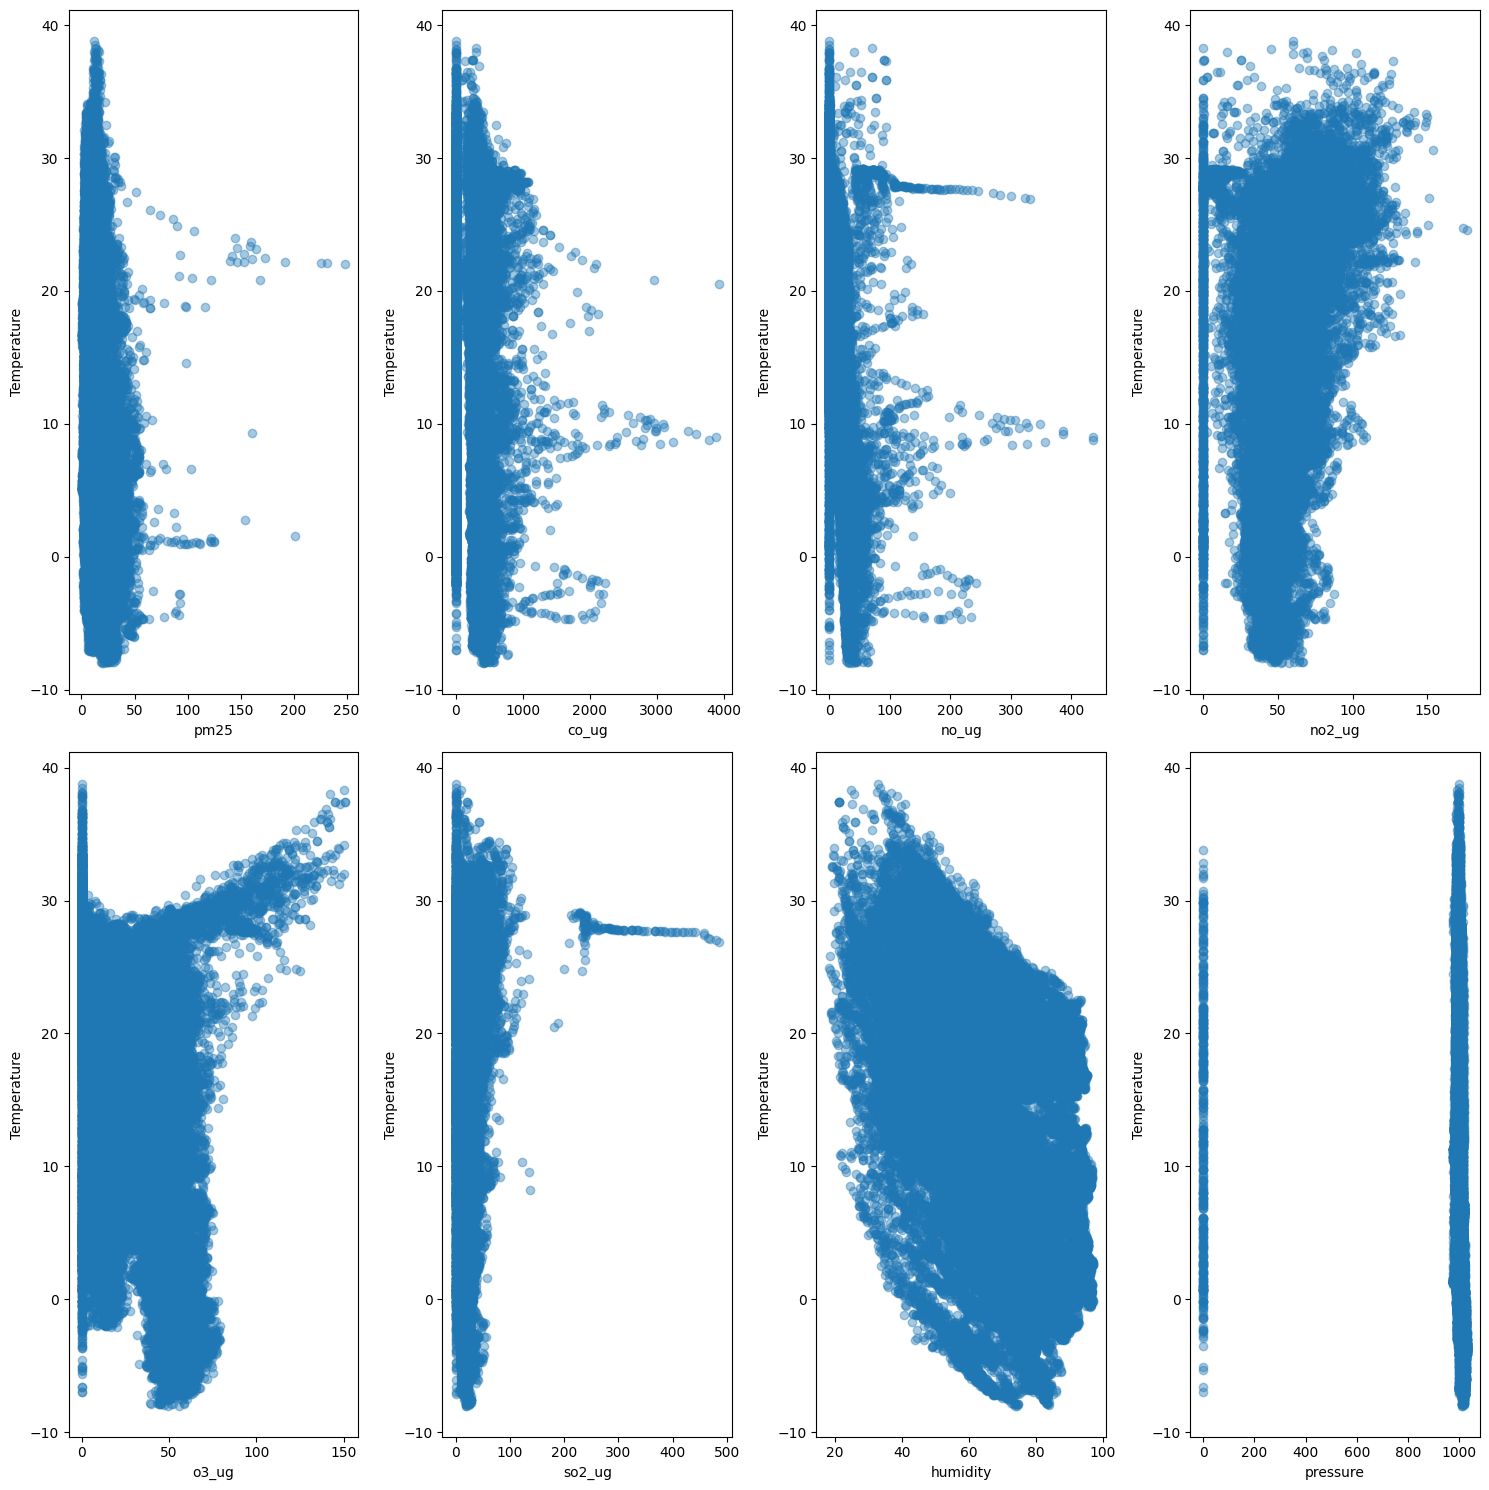

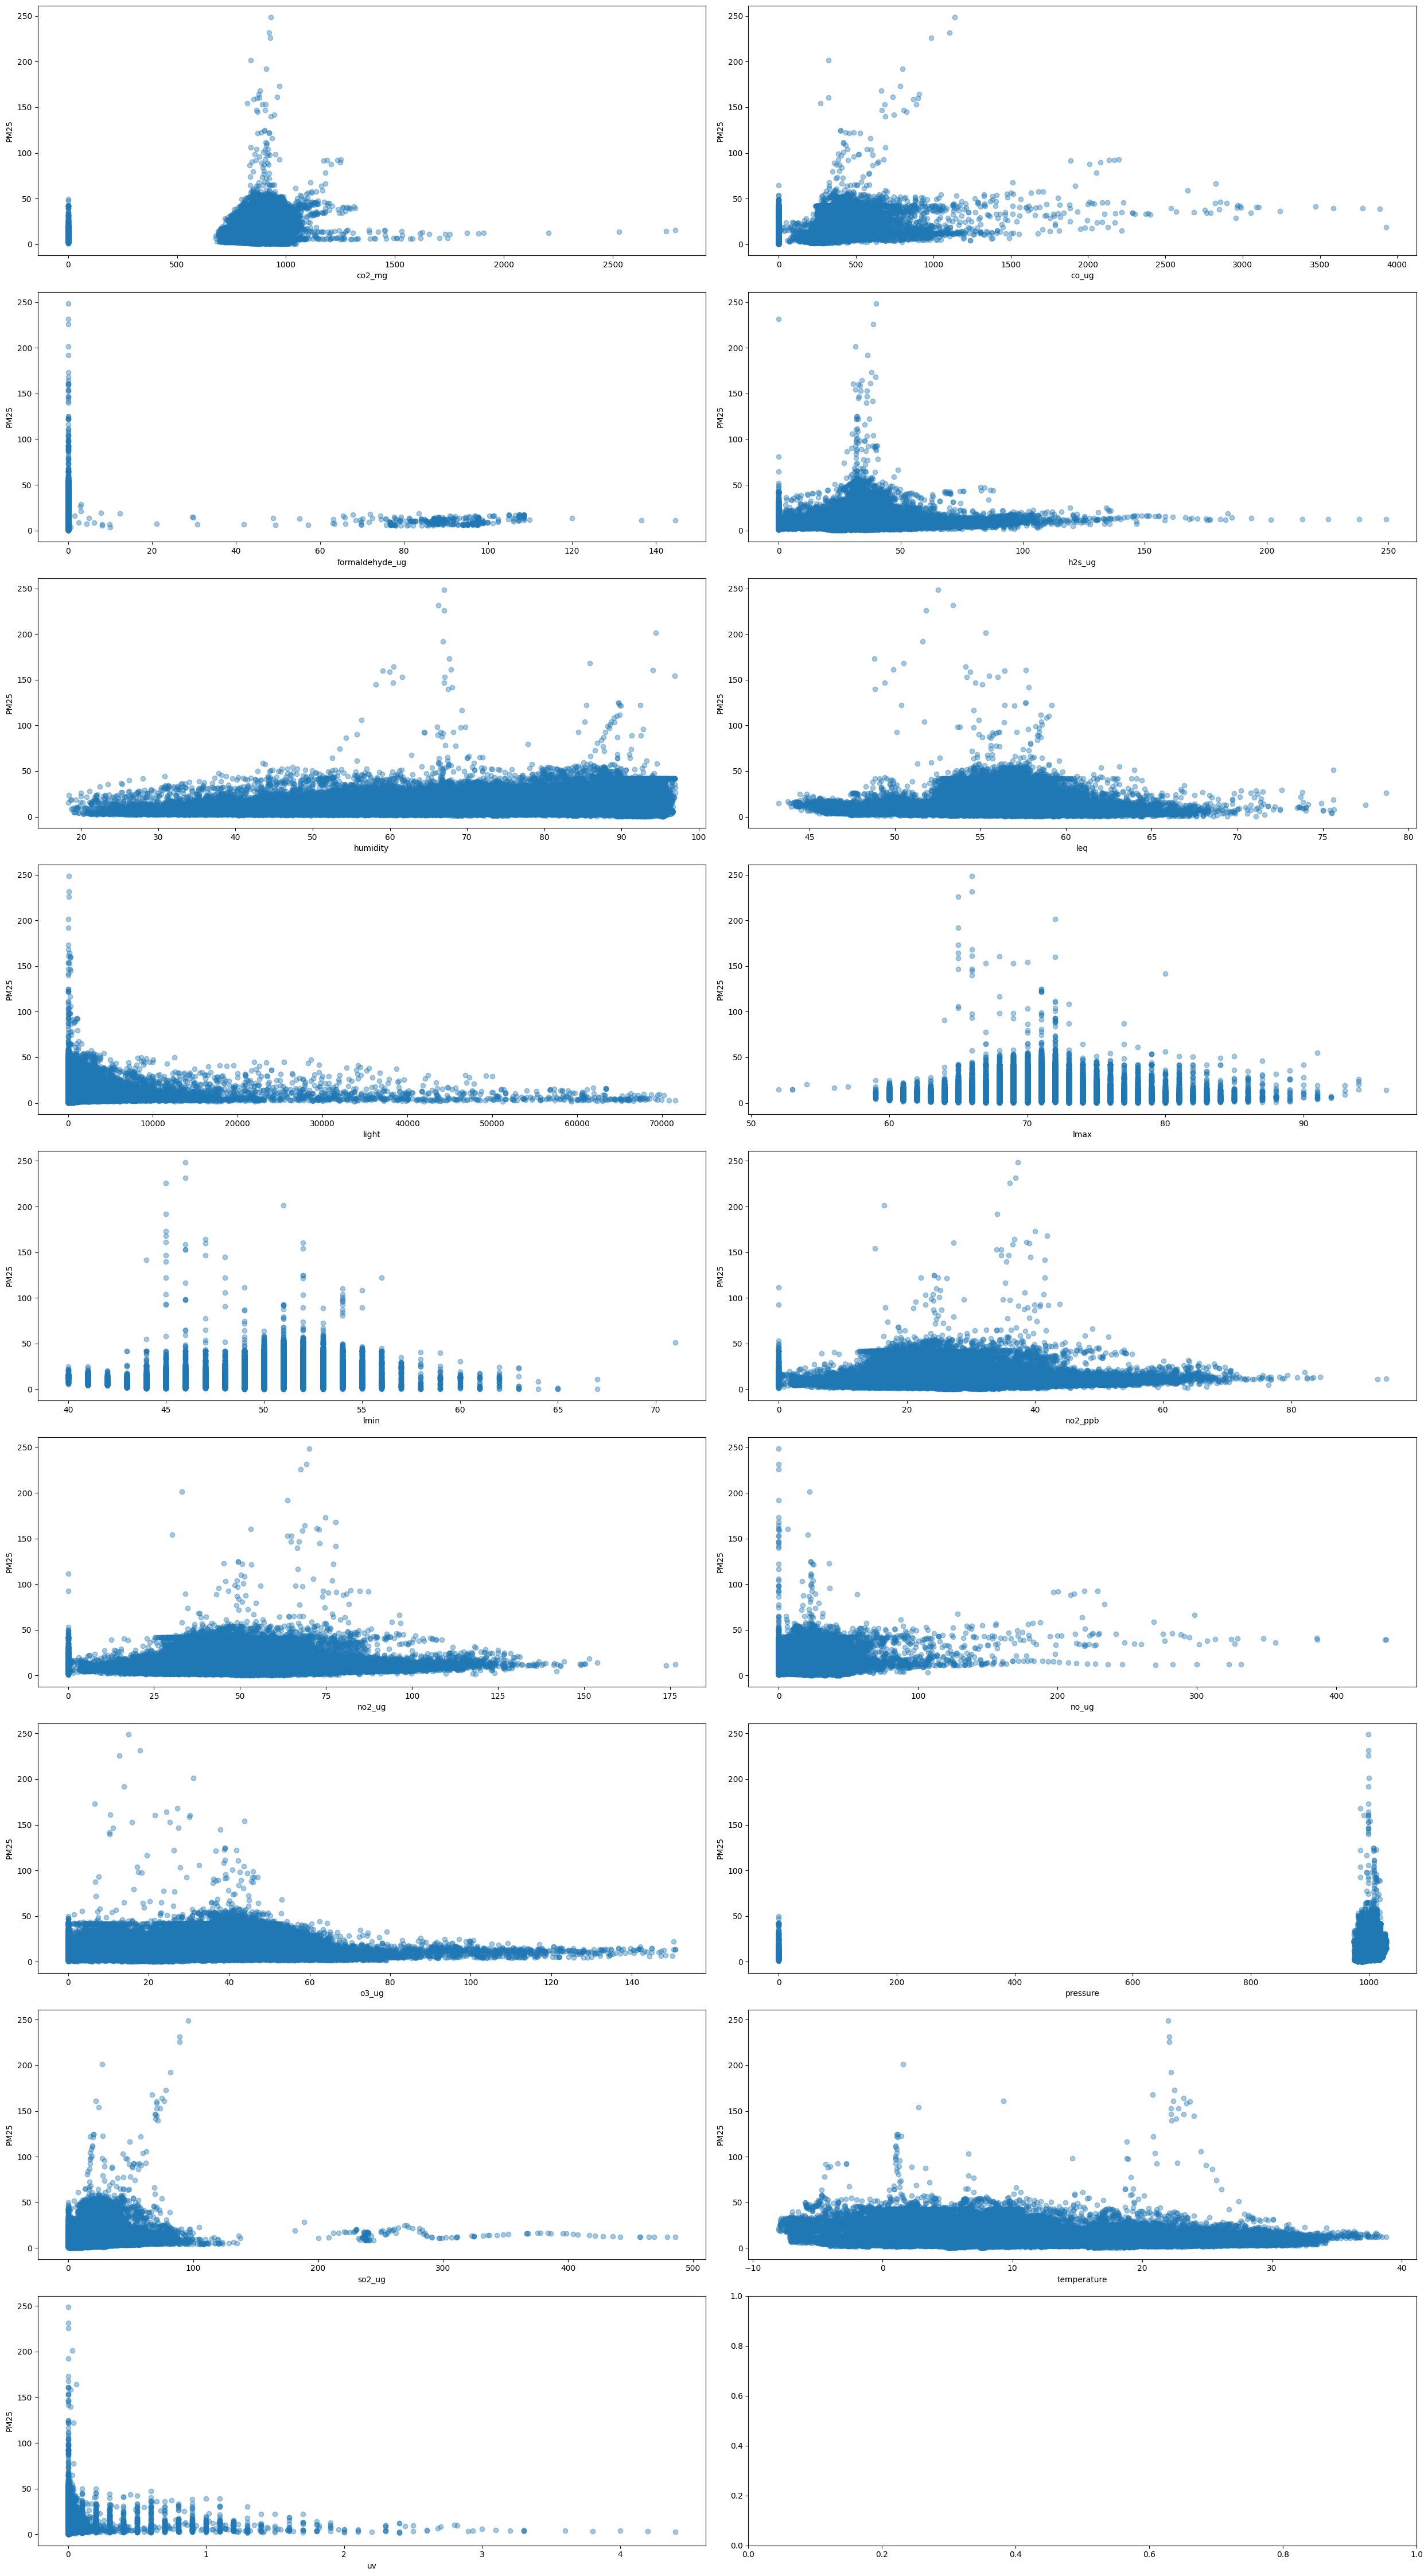

In [8]:
# Перший сценарій
X_cols = ["pm25", "co_ug", "no_ug", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure"]
Y_col = df_wide.temperature

fig, axis = plt.subplots(2, 4, figsize=(15, 15))
axis = axis.flatten()

for i, col in enumerate(X_cols):
  axis[i].scatter(df_wide[col], Y_col, alpha=0.4)
  axis[i].set_xlabel(col)
  axis[i].set_ylabel("Temperature")

plt.tight_layout()
plt.show()

# Третій сценарій
X_cols = ['co2_mg', 'co_ug',
       'formaldehyde_ug', 'h2s_ug', 'humidity', 'leq', 'light',
       'lmax', 'lmin', 'no2_ppb', 'no2_ug', 'no_ug',
       'o3_ug', 'pressure',
       'so2_ug', 'temperature', 'uv']
Y_col = df_wide.pm25

fig, axis = plt.subplots(9, 2, figsize=(25, 45))
axis = axis.flatten()

for i, col in enumerate(X_cols):
  axis[i].scatter(df_wide[col], Y_col, alpha=0.4)
  axis[i].set_xlabel(col)
  axis[i].set_ylabel("PM25")

plt.tight_layout()
plt.show()


# **BLOCK 4**
### Детектувати аномалії, неповні зразки у даних, тощо.

595


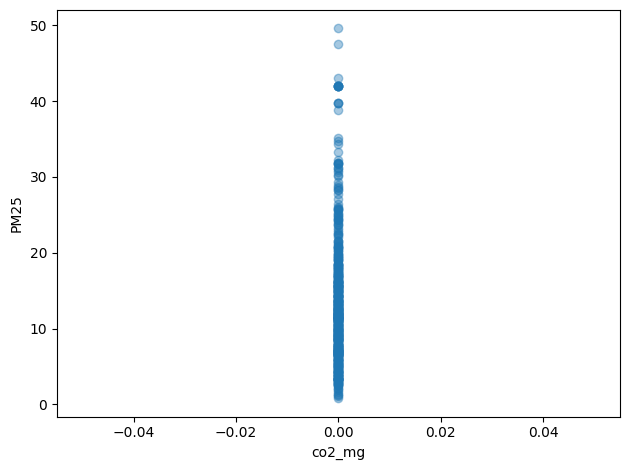

957


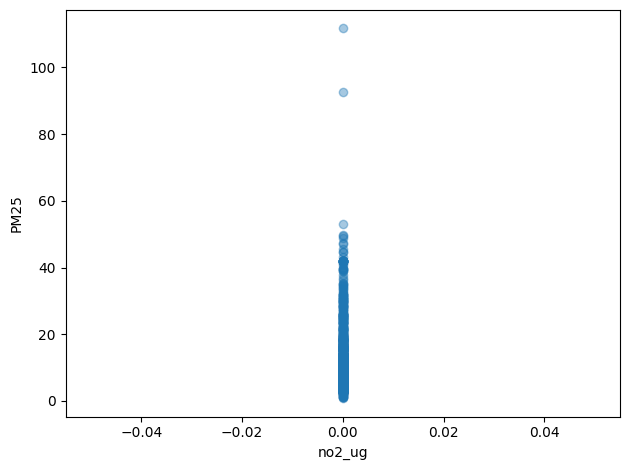

5307


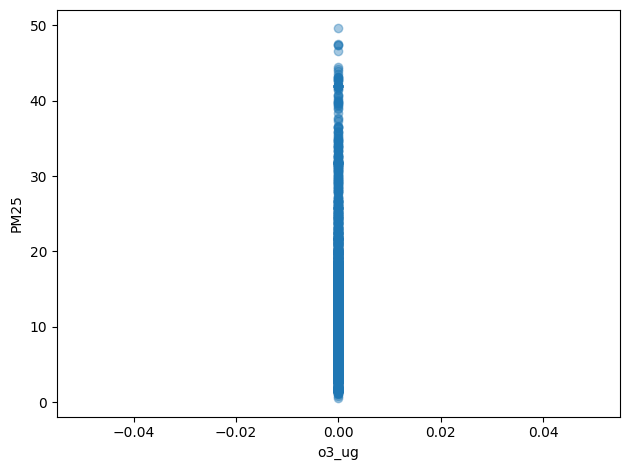

3363


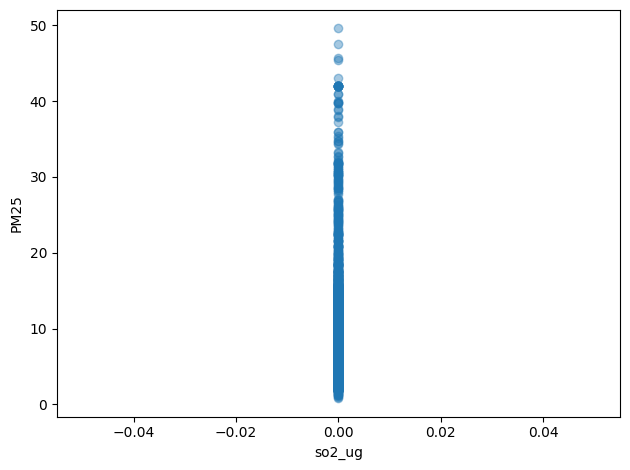

0


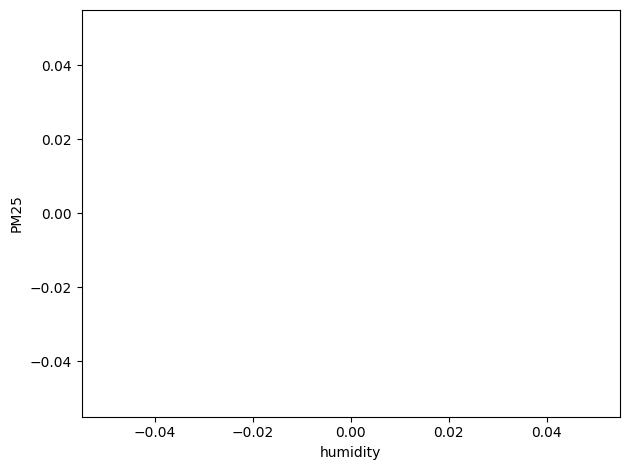

389


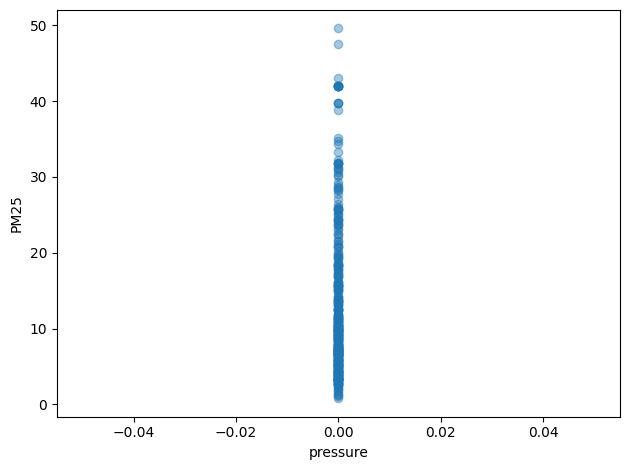

21


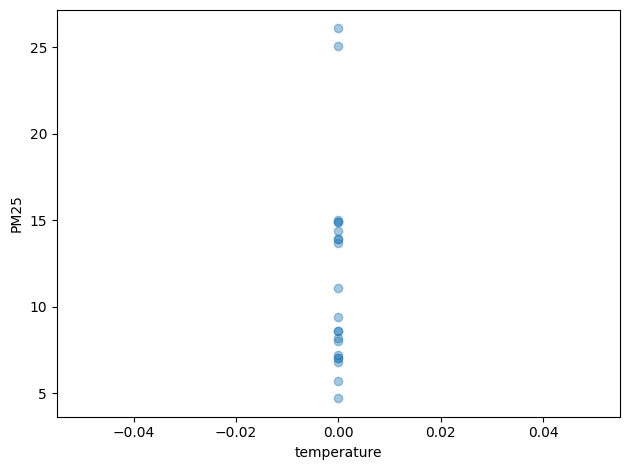

In [9]:
X_cols = ["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]
Y_col = df_wide.pm25

# mask_without_null = df_wide.co_ug == 0

for i, col in enumerate(X_cols):

  # if col in ["o3_ug"]:
  #   mask_without_null &= df_wide[col] == 0

  mask = df_wide[col] == 0
  print(mask.sum())
  plt.scatter(df_wide.loc[mask, col], Y_col[mask], alpha=0.4)
  plt.xlabel(col)
  plt.ylabel("PM25")
  plt.tight_layout()
  plt.show()

# print("mask", mask_without_null.sum())

595


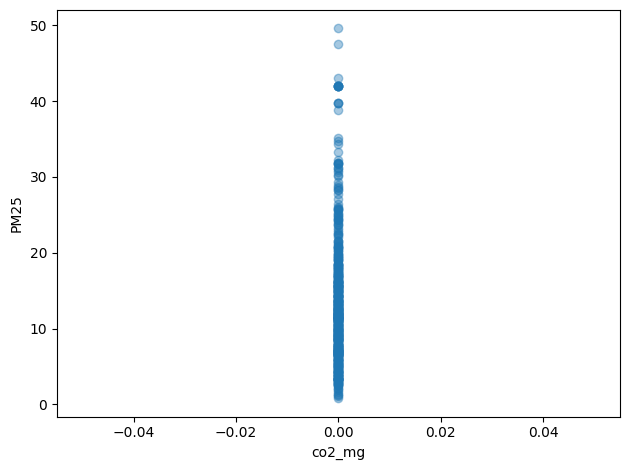

957


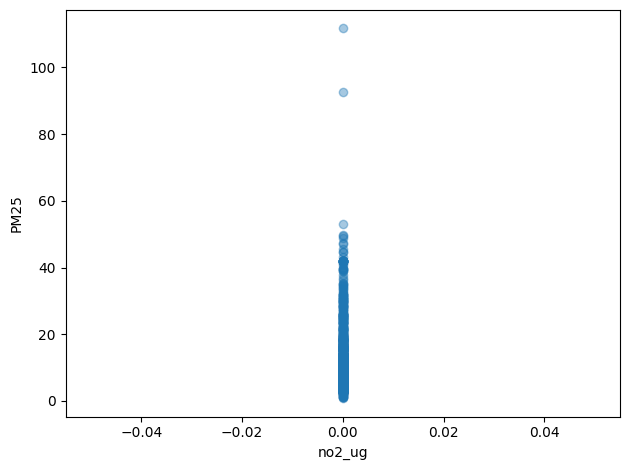

5307


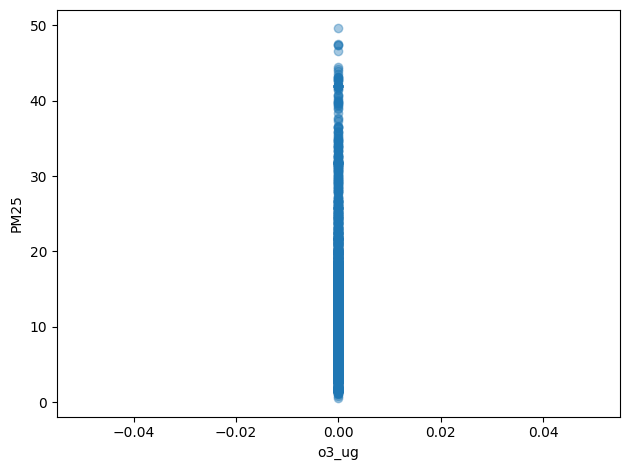

3363


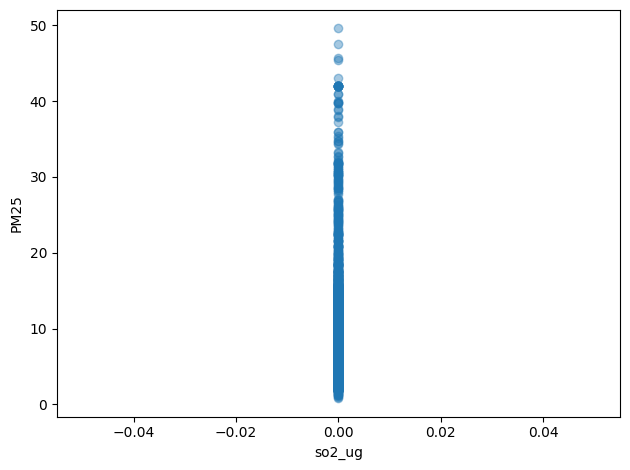

0


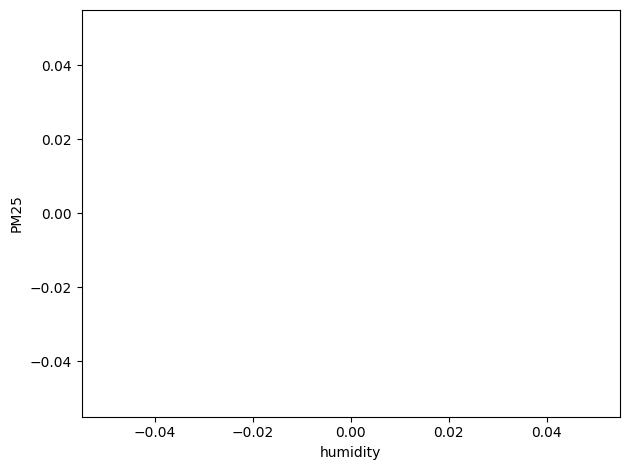

389


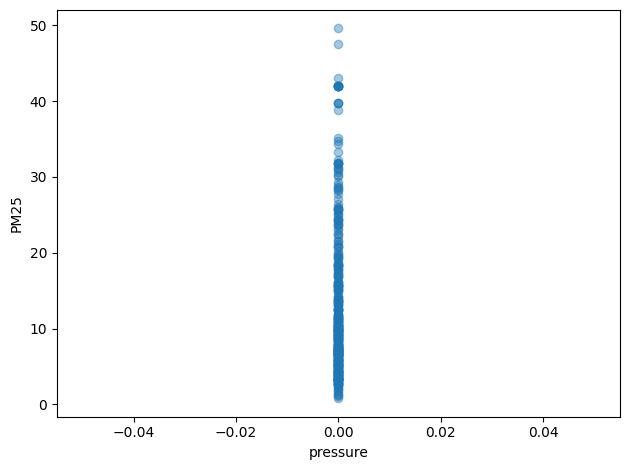

3807


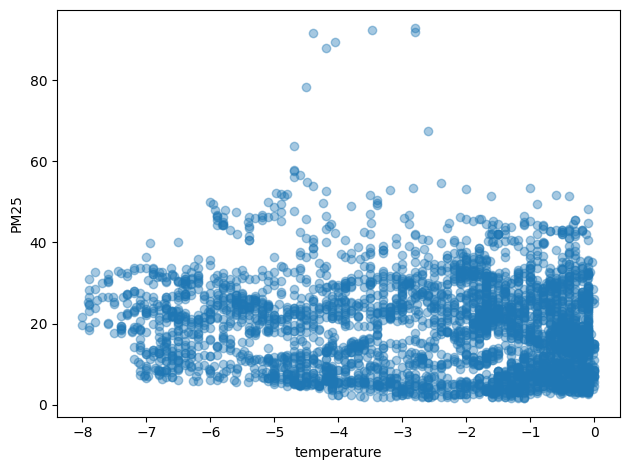

In [10]:
for i, col in enumerate(X_cols):

  # if col in ["o3_ug"]:
  #   mask_without_null &= df_wide[col] == 0

  mask = df_wide[col] <= 0
  print(mask.sum())
  plt.scatter(df_wide.loc[mask, col], Y_col[mask], alpha=0.4)
  plt.xlabel(col)
  plt.ylabel("PM25")
  plt.tight_layout()
  plt.show()

##  На іншому colab notebook проводилось дослідження для першого сценарію і висунув декілька гіпотез одна із них буде корисна тут:
###- Для CO, SO2, NO2 нулі є часто технічні. Тобто датчик вище потрібної чутливості або у той момент не працював. Тому на мою думку CO варто не використовувати, як параметр, тільки щоб виявити перетин множин семплів (= 0) із CO та SO2, CO2, O3 та NO_x щоб видалити їх.

### - Кількість нулів O3 (озон) пояснюється тим, що у той період часу ніч або зима. І тоді у ночі низький CO, а у зимку кількість сонячної радіації менша, що заважає утворенню озону і водночас дисперсія карбон II оксиду менша. Отже ми маємо спостерігати низьний показник озону та високий показник CO. Тому семпли, де СO (= 0) & O3 (= 0) потрібно видалити, а частину інших залишити

### - Що до тиску (pressure), то там технічні помилки, адже нормальний тиск 1013 гПа.

In [11]:
["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]

df_wide_1 = df_wide[
  ~(
        (df_wide.pressure == 0) |
        ((df_wide.co2_mg == 0) & (df_wide.no2_ug == 0)) |
        ((df_wide.co_ug == 0) & (df_wide.so2_ug == 0)) |
        ((df_wide.co_ug == 0) & (df_wide.o3_ug == 0))
  )
    ]
df_wide_1.shape

(40525, 29)

In [12]:
X_cols = ["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]
Y_col = df_wide.pm25

for i, col in enumerate(X_cols):
  mask = df_wide_1[col] == 0
  print(f"{col}", mask.sum())

co2_mg 38
no2_ug 423
o3_ug 737
so2_ug 1246
humidity 0
pressure 0
temperature 21


### Візуалізую гістограму, а також KDE щоб переглянути в графіку ймовірності

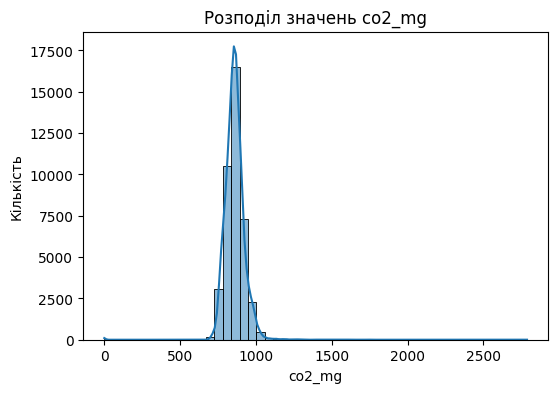

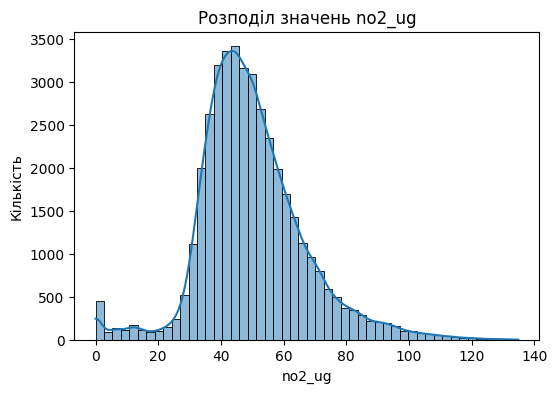

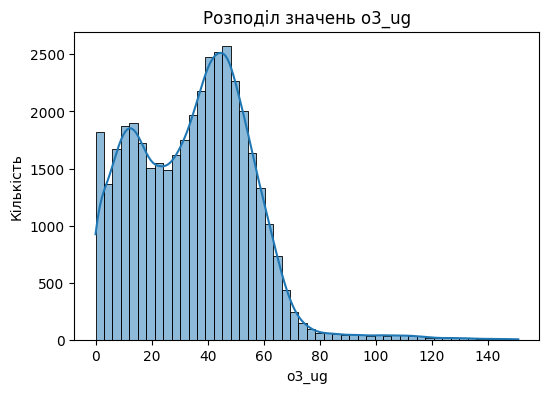

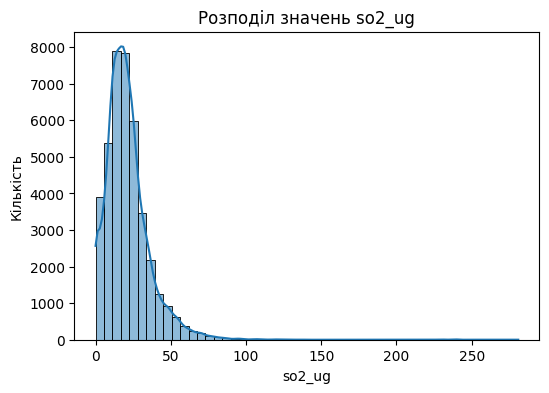

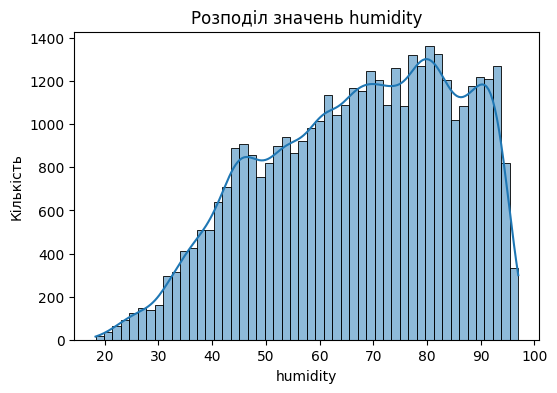

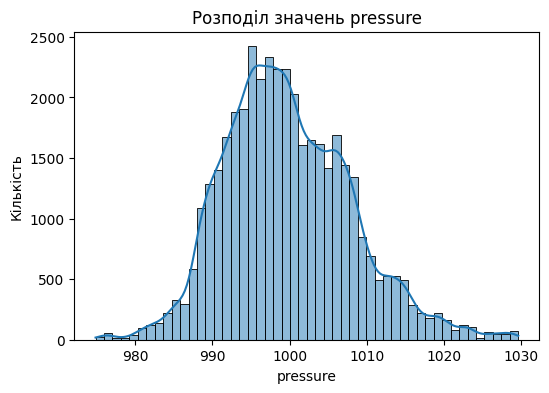

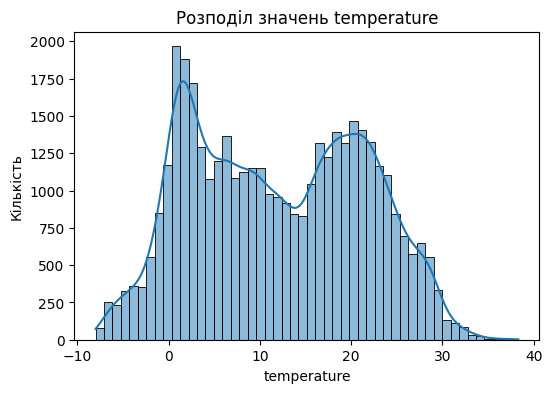

In [13]:
for col in X_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_wide_1[col], bins=50, kde=True)
    # plt.xlim(-1, 100)
    plt.title(f"Розподіл значень {col}")
    plt.xlabel(col)
    plt.ylabel("Кількість")
    plt.show()

Count 0:  954 
 Range:  39207


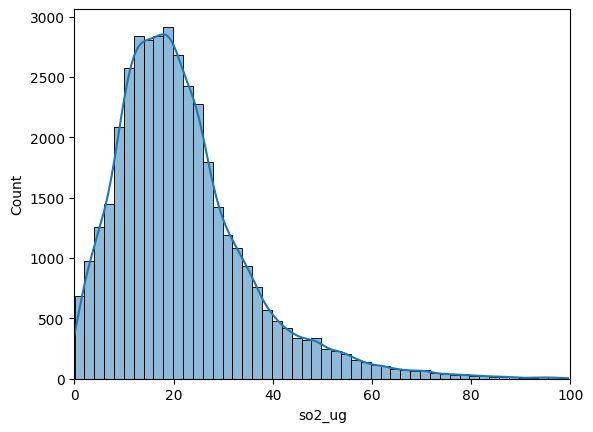

In [14]:
sns.histplot(df_wide_1.so2_ug[(df_wide_1['so2_ug'] > 0) & (df_wide_1['so2_ug'] < 100)], bins=50, kde=True)
plt.xlim(0, 100)
# plt.ylim(0, 20)
range_so2_ug = (df_wide_1.so2_ug[(df_wide_1['so2_ug'] > 0) & (df_wide_1['so2_ug'] < 100)]).count()
print("Count 0: ", 40161 - range_so2_ug, "\n", "Range: ", range_so2_ug )

### Візуалізувавши розподіли деякі питання можуть виникнути лише до o3_ug, co2_mg та so2_ug ситуація краща - хоча і є викиди, але великої кількості нулів нема, що говорить про нормальну роботу датчика. <br><br><br> Отже технічні питання із датасетом вирішемо можна переходити до графіків, які допоможуть проаналізувати дані і зададуть вектор руху

In [15]:
df_wide_1.shape

(40525, 29)

In [16]:
# Інніціалізація зміних із якими будемо працювати далі
df_regression_1 = df_wide_1[["pm25", "co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]].copy().iloc[:21500, :]

# Задав верхню межу для викидів щоб графікі були більш інформативні
#IQR rule (ящик з вусами)
Q1 = df_regression_1.so2_ug.quantile(0.25)
Q3 = df_regression_1.so2_ug.quantile(0.75)
IQR = Q3-Q1

# lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

# df_regression_1 = df_regression_1[(df_regression_1['so2_ug'] >= lower_lim) & (df_regression_1['so2_ug'] <= upper_lim)]
df_regression_1 = df_regression_1[(df_regression_1['so2_ug'] <= upper_lim)]


X = df_regression_1[["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]].copy()
X = X.to_numpy()


y = df_regression_1.pm25.copy()
y = y.to_numpy()

print(df_regression_1.count())
df_regression_1.describe()

phenomenon
pm25           21238
co2_mg         21238
no2_ug         21238
o3_ug          21238
so2_ug         21238
humidity       21238
pressure       21238
temperature    21238
dtype: int64


phenomenon          pm25        co2_mg        no2_ug         o3_ug  \
count       21238.000000  21238.000000  21238.000000  21238.000000   
mean           15.040308    873.870798     43.976397     27.428077   
std            11.425227     68.019830     12.836048     19.932793   
min             0.200000      0.000000      0.000000      0.000000   
25%             6.000000    839.772475     36.993800     10.331925   
50%            11.500000    868.005600     43.122500     21.172700   
75%            21.700000    902.091750     51.059850     45.904950   
max           201.200000   2787.136300    113.556800     79.043100   

phenomenon        so2_ug      humidity      pressure   temperature  
count       21238.000000  21238.000000  21238.000000  21238.000000  
mean           17.687604     72.746822   1001.612118      8.484411  
std             8.489739     16.484640      9.002838      8.754531  
min             0.000000     22.690000    974.890000     -7.920000  
25%            11.885825     62.600000    995.110000      1.600000  
50%            18.024200     76.600000   1001.750000      5.900000  
75%            23.701125     85.715000   1007.350000     14.700000  
max            41.781900     97.000000   1029.600000     30.000000

In [17]:
reg = linear_model.LinearRegression()
reg.fit(X, y)
print("Intercept + beta coef_", reg.intercept_, reg.coef_, "\n\n")

X_with_ones = sm.add_constant(X)
XTX_inv = np.linalg.inv(X_with_ones.T @ X_with_ones)

beta = XTX_inv @ X_with_ones.T @ y
print("beta_matrix: ", beta, "\n\n")

# y_predict = X @ beta
y_predict = reg.predict(X)

e_i = y - y_predict

Intercept + beta coef_ -99.88493087104803 [-0.00433151 -0.07231377 -0.02513717  0.438022    0.14298114  0.10623302
 -0.23257732] 


beta_matrix:  [-9.98849309e+01 -4.33151401e-03 -7.23137699e-02 -2.51371691e-02
  4.38021998e-01  1.42981140e-01  1.06233024e-01 -2.32577318e-01] 




In [18]:
print("reg R_2:", reg.score(X, y))


def R_2(y, y_predict):
  R = 1 - (((y - y_predict)**2).sum() / ((y - y.mean())**2).sum() )
  return R
print("Matrix R_2", R_2(y, y_predict))

reg R_2: 0.35832810228155454
Matrix R_2 0.35832810228155454


### Експериментально було отримана потрібна кількість семплів як 15000 (train) тому далі дані для тесту. але при використанні регуляризації будуть експеременти із більшою кількістю семплів

In [19]:
def DIAGNOSTIC_PLOTS(X, y, y_predict, e_i):
  fig, axes = plt.subplots(2, 3, figsize=(25, 20))

  # Residuals vs Fitted
  axes[0, 0].scatter(y_predict, e_i, alpha=0.3)
  axes[0, 0].axhline(y=0, color="r", linestyle='-', )
  axes[0, 0].set_xlabel("y_pred")
  axes[0, 0].set_ylabel("residuals")
  axes[0, 0].grid(True)

  # 1. Lowess smoothing line -- це непараметричний метод зглажування даних,
  # а також треба додати поліноміальні\нелінійні.
  # Метод полягає у тому щоб не застосовувати глобальну модель.
  # Сусідні точки отримують ваги, які зменшуються з відстанню від центральної
  # точки (зазвичай трикутна або гаусова функція).
  # Підгонка робиться «ковзаючим вікном», і результатом є гладка крива.

  lowess_result = lowess(e_i, y_predict, frac=0.6)
  axes[0, 0].plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=2)

  # 2. Q-Q plot (Quantile-Quantile plot)
  # Графік, який порівнює розподіл даних (використовувався для залишків)
  # з теоретчним розподілом (нормальним)

  RSS = np.sum(e_i**2)
  sigma_hat = np.sqrt(RSS / (X.shape[0] - X.shape[1] - 1))
  std_residuals = e_i / sigma_hat

  stats.probplot(std_residuals, dist="norm", plot=axes[0, 1])
  axes[0, 1].set_title('Normal Q-Q Plot\n(Check normality)')

  # 3. Scale-Location (Spread-Location)
  # Використовується для діагностики гетероскедастичності
  # як приклад із різними цінами [1, 2, 3, 4,    100, 120, 160, 190]
  sqrt_abs_std_residuals = np.sqrt(np.abs(std_residuals))
  axes[0, 2].scatter(y_predict, sqrt_abs_std_residuals, alpha=0.5)
  lowess_sl = lowess(sqrt_abs_std_residuals, y_predict, frac=0.6)
  axes[0, 2].plot(lowess_sl[:, 0], lowess_sl[:, 1], 'r-', linewidth=2)
  axes[0, 2].set_xlabel('Fitted values')
  axes[0, 2].set_ylabel('√|Standardized residuals|')
  axes[0, 2].set_title('Scale-Location\n(Check homoscedasticity)')


  # 4. Residuals vs Leverage
  # Calculate leverage (hat values)
  X_scaled = X.copy()
  min = np.min(X_scaled[:, 1:], axis = 0)
  max = np.max(X_scaled[:, 1:], axis = 0)

  X_scaled[:, 1:] = (X_scaled[:, 1:] - min) / (max - min)

  XtX_inv = np.linalg.inv(X_scaled.T @ X_scaled)

  h_ii = np.sum((X_scaled @ XtX_inv) * X_scaled, axis=1)

  axes[1, 0].scatter(h_ii, std_residuals, alpha=0.5)
  axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
  axes[1, 0].set_xlabel('Leverage')
  axes[1, 0].set_ylabel('Standardized residuals')
  axes[1, 0].set_title('Residuals vs Leverage\n(Identify influential points)')

  # Add Cook's distance contours
  # Апроксимація меж важливих точок
  x_lev = np.linspace(0.001, np.max(h_ii)*1.1, 100)
  for cook_level in [0.5, 1.0]:
      y_cook_upper = np.sqrt(cook_level * (X.shape[1]+1) * (1 - x_lev) / x_lev)
      y_cook_lower = -y_cook_upper
      axes[1, 0].plot(x_lev, y_cook_upper, 'r--', alpha=0.5, linewidth=1)
      axes[1, 0].plot(x_lev, y_cook_lower, 'r--', alpha=0.5, linewidth=1)

  # 5. Histogram of residuals
  axes[1, 1].hist(std_residuals, bins=30, edgecolor='black', alpha=0.7)
  axes[1, 1].axvline(x=0, color='r', linestyle='--')
  x_norm = np.linspace(-4, 4, 100)
  axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm) * len(e_i) * 0.5, 'r-', linewidth=2)
  axes[1, 1].set_xlabel('Standardized residuals')
  axes[1, 1].set_ylabel('Frequency')
  axes[1, 1].set_title('Histogram of Residuals\n(Check normality)')

  # 6. Partial regression plots (for first predictor X1)
  # Residuals of Y ~ X0(intercept) + X2 + X3 + ... + X7
  X_with_intercept = X
  X_others = np.delete(X_with_intercept, 1, axis=1)  # Exclude X1 (column 1)


  model_y_others = sm.OLS(y, X_others).fit()
  resid_y = model_y_others.resid

  # Residuals of X1 ~ X0(intercept) + X2 + X3 + ... + X7
  model_x1_others = sm.OLS(X_with_intercept[:, 1], X_others).fit()
  resid_x1 = model_x1_others.resid

  axes[1, 2].scatter(resid_x1, resid_y, alpha=0.5)
  partial_slope = np.cov(resid_x1, resid_y)[0, 1] / np.var(resid_x1)
  axes[1, 2].plot(resid_x1, partial_slope * resid_x1, 'r-', linewidth=2)
  axes[1, 2].set_xlabel('X1 residuals')
  axes[1, 2].set_ylabel('y residuals')
  axes[1, 2].set_title(f'Partial Regression Plot (X1)\nSlope = {partial_slope:.4f}')

  plt.tight_layout()
  plt.show()

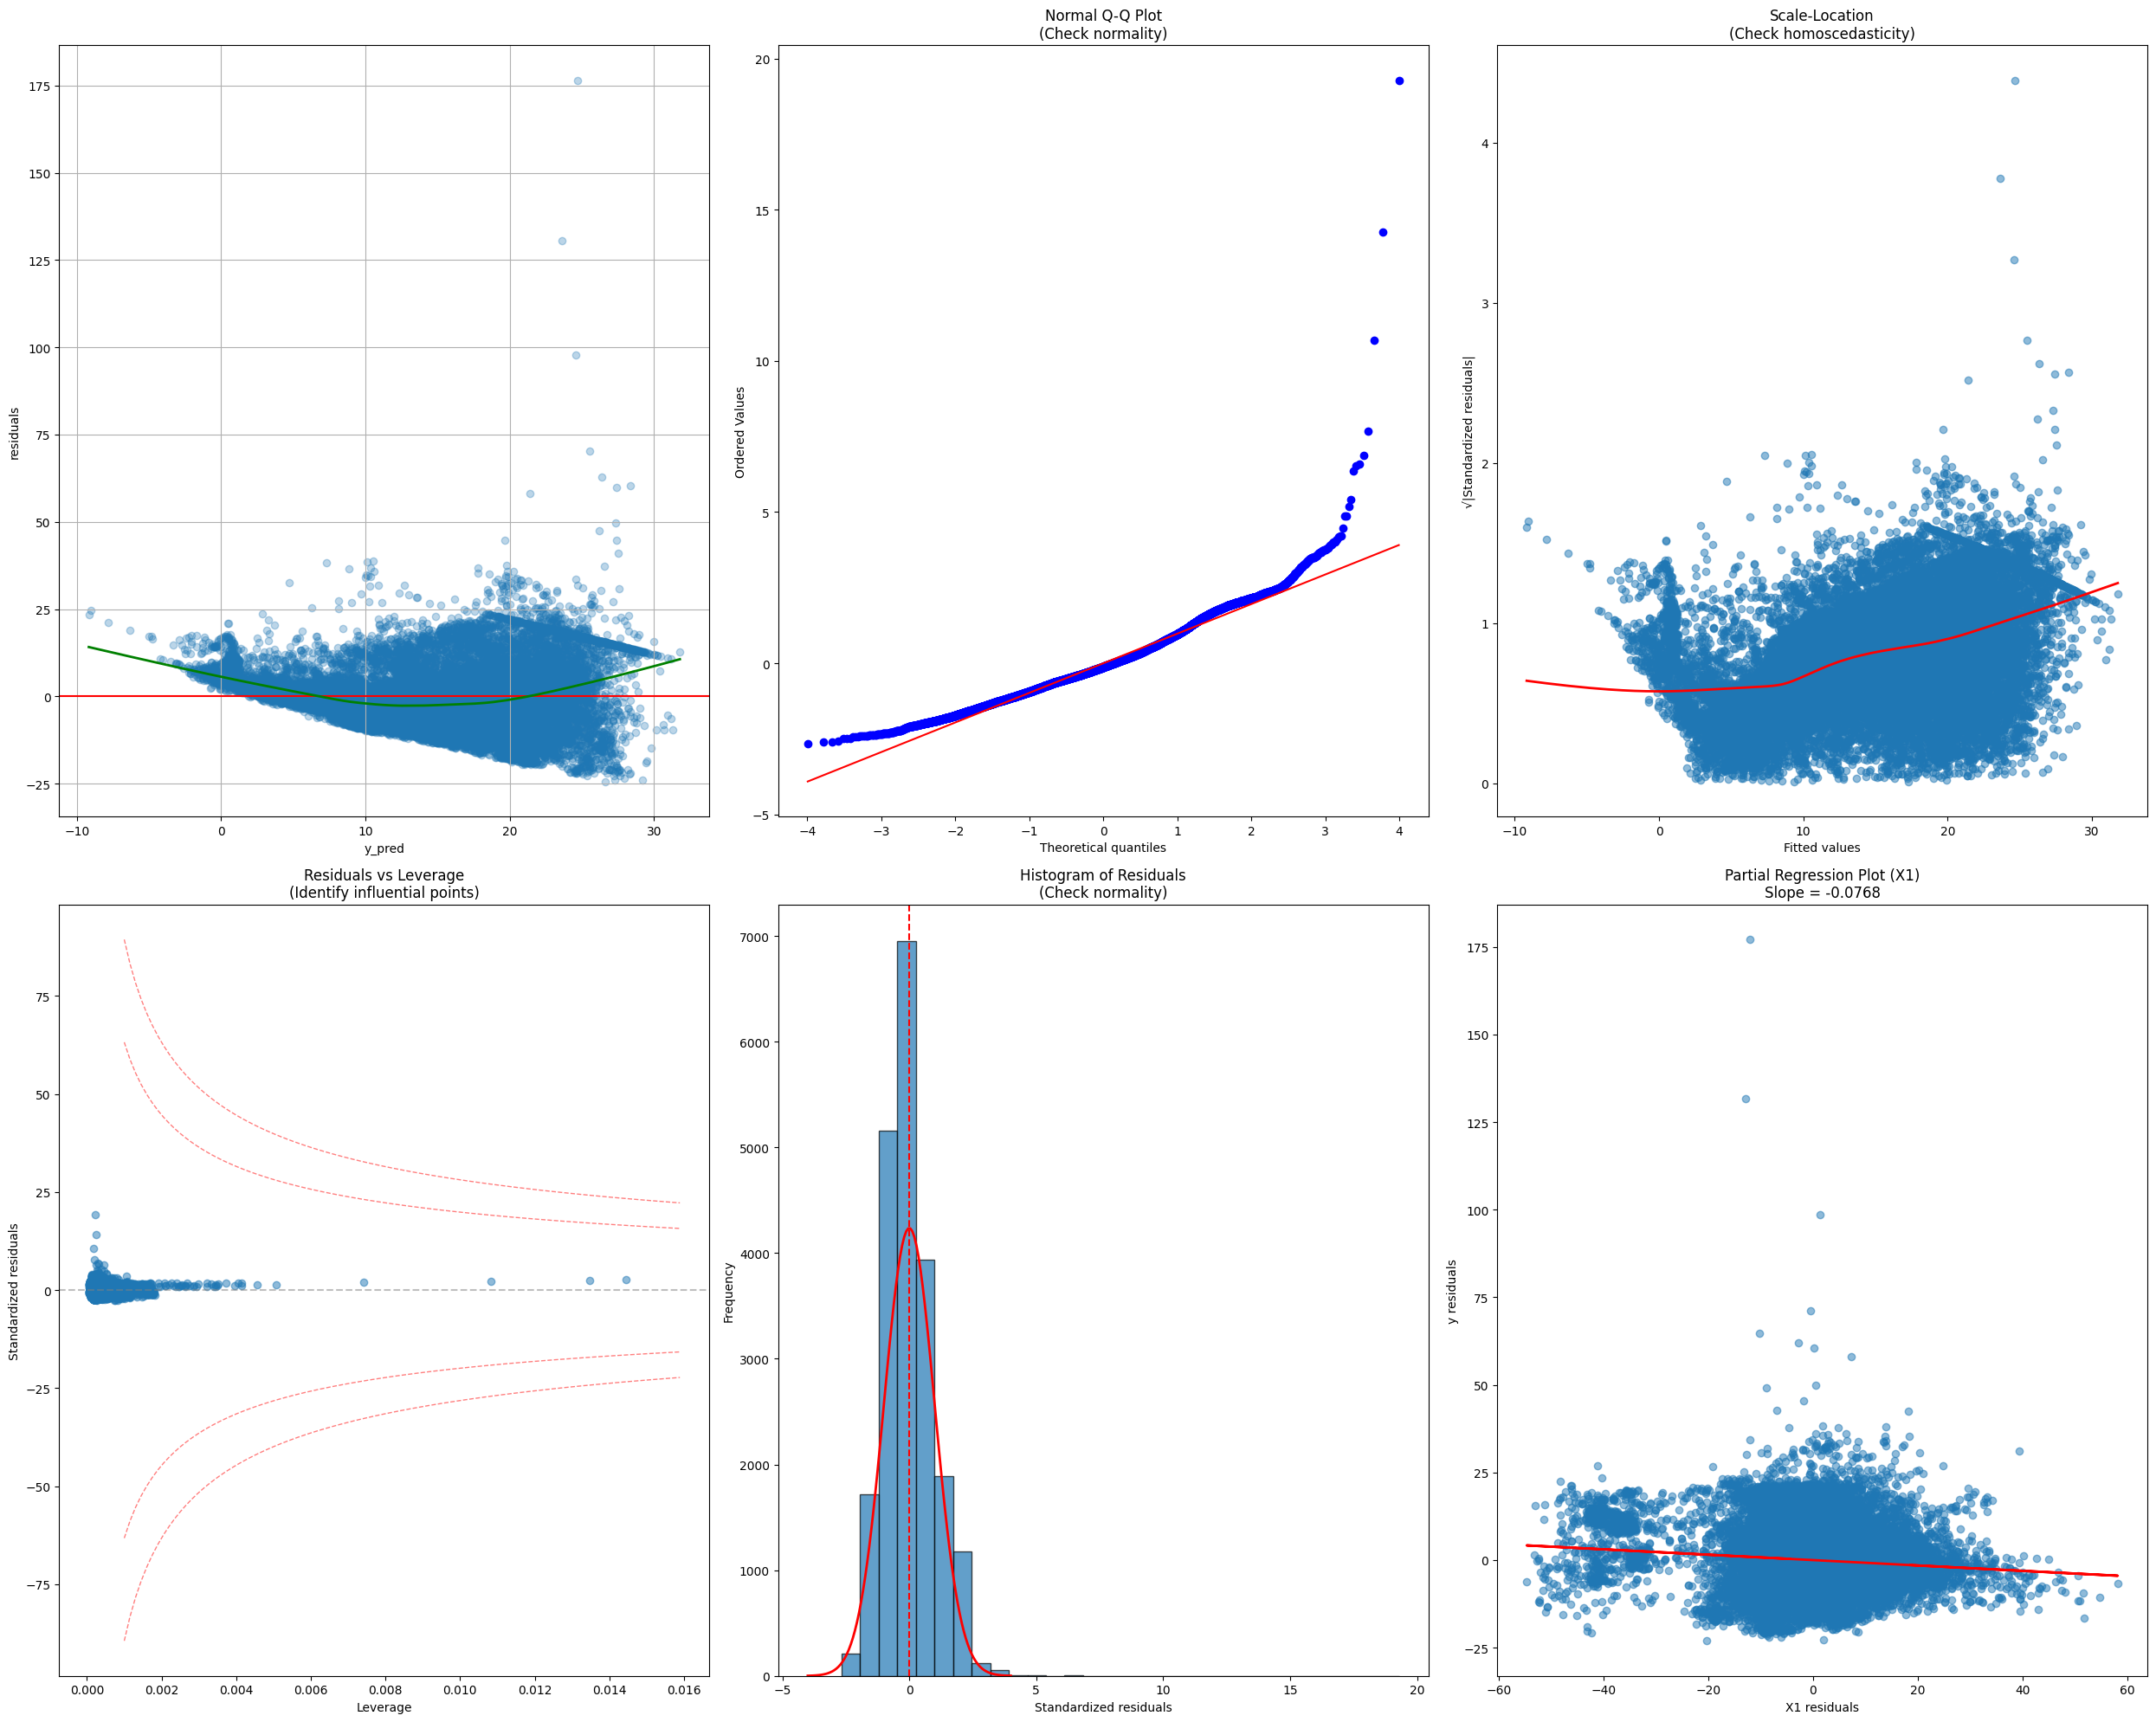

In [20]:
DIAGNOSTIC_PLOTS(X, y, y_predict, e_i)

## Висновок для **Block 4.0**, де дані були із явними outliers:

## 1. Зелена лінія Lowess відхиляється від горизонталі. Це означає, що лінійна модель погано описує звʼязок, а також кілька outliers, які дуже відрізняються.
## **Можна додати поліноміальні або нелінійні предикатори та прибрати outliers**
## 2. На хвостах є heavy tails (сильні відхилення).
## **Припущення про нормальність залишків порушується**
## 3. Маємо ознаку гетероскедастичності, осоливо бачимо, що є переломний момент, де дисперсія залишків збільшується із ростом прогнозованих значень
## **...**
## 4. Більшість точок мають малі значення leverage і жодна не перетинає контурів Cook's distance. Модель стабільна щодо одиночних спостережень
## 5. Розподіл скошений. Наявність густого центру означає, що більшість прогнозів адекватні, але викиди викривляють форму
## **Потрібно бути обережним із класичними t-/F-тести - можуть бути ненадійними**
## 6. Для X1 спостерігається слабкий негативний вплив. Точки розкидані, отже вплив X1 не є лінійний або супроводжується шумом

## **У загальному тяжко надати висновок, так як потрібно працювати із даними, адже через outliars, гетероскедастичність та автокореляцію багато інформації спотворено. Тому далі більшість метрик і тестів будуть проведені після вирішення пролем із даними**


---



# **Block 4.1**
## **Наступні етапи роботи:**

###0.  VIF + DIAGNOSTIC TEST<br>
### **DIAGNOSTIC STATISTICS**
###1.  Identify high-leverage points:  $h_{ii}$ > $\frac{2p}{n}$
###2.  Check for outliers(3 sigma): $\frac{|r_i|}{s\sqrt{1-h_{ii}}}> 3$ <br>s = RMSE

###3.  Assess influence: Cook's Distance, DFFITS, DFBETAS <br>
###4.  Investigate influential points for data errors or special cases. <br><br> Якщо точка має великий залишок, але малий leverage → вона не зіпсує модель (типовий «шум»).<br><br> Якщо точка має великий leverage, але малий залишок → вона просто «сидить далеко», але добре вписується.<br><br> Якщо точка має великий leverage і великий залишок → справжня проблемна точка.

###5.  Consider robust regression if legitimate outliers exist

In [21]:
def DIAGNOSTIC_TEST(X, y, y_predict, e_i, beta, columns=["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]):
  """X - with intercept"""
  X_with_ones = np.asarray(X)
  y = np.asarray(y)
  y_predict = np.asarray(y_predict)
  e_i = np.asarray(e_i)

  # VIF_j = 1 / (1 - (R^2)_j)
  vif_dict = dict()
  columns = columns

  X_without_ones = np.delete(X, 0, axis=1)


  for i in range(X_without_ones.shape[1]):
    y_i = X_without_ones[:, i]
    X_other = np.delete(X_without_ones, i, axis=1)

    reg_i_block_4 = linear_model.LinearRegression()
    reg_i_block_4.fit(X_other, y_i)

    y_i_predict = reg_i_block_4.predict(X_other)

    r_2 = 1 - (np.sum((y_i - y_i_predict)**2) / np.sum((y_i - y_i.mean())**2))

    # r_2 = reg.score(X_other, y_i)

    vif = 1/ (1 - r_2) if r_2 < 1 else np.inf
    vif_dict[columns[i]] = vif


  #1.DIAGNOSTIC STATISTICS


  # Shapiro-Wilk test for normality
  stat_SW, pval_SW = stats.shapiro(e_i)

  # Jarque-Bera test for normality
  n = e_i.shape[0]
  mean = np.mean(e_i)
  s = np.std(e_i, ddof=1) # 1 - це НЕзміщенестандартне відхилення

  skewness = np.mean(((e_i)/s)**3)
  kurtosis = np.mean(((e_i)/s)**4)

  JB = n/6 * (skewness**2 + ((kurtosis-3)**2)/4)
  pval_JB = 1 - stats.chi2.cdf(JB, df=2) # розподіл хі-квадрат

  # Condition number (multicollinearity indicator)

  XT_X = X_with_ones.T @ X_with_ones
  eigs = np.linalg.eigvals(XT_X) # діагональні елементи
  cond_num = np.sqrt(np.max(eigs) / np.min(eigs))

  # RESET test for functional form
  y_RT = y_predict.copy()


  # Додаткові регресори
  y_RT2 = y_RT**2
  y_RT3 = y_RT**3

  X_reset = np.c_[X_with_ones, y_RT2, y_RT3]



  # !!!!!!!!!!!!!!!!!!!!!!!!!
  # beta_base = np.r_[reg.intercept_, reg.coef_]
  beta_base = beta
  resid_base = y - X_with_ones @ beta_base
  R_0 = resid_base.T @ resid_base

  beta_reset =  np.linalg.lstsq(X_reset, y, rcond=None)[0]
  resid_reset = y - X_reset @ beta_reset
  R_1 = resid_reset.T @ resid_reset

  # F-статистика
  n = X_with_ones.shape[0]
  k = 7
  q = 2 # y**2, y**3

  F = ((R_0 - R_1) / q) / (R_1 / (n - k - q - 1))
  pval_RT = 1 - stats.f.cdf(F, q, n - k - q - 1)

  # Breusch-Pagan test for heteroscedasticity
  u2 = e_i**2

  beta_aux = np.linalg.lstsq(X_with_ones, u2, rcond=None)[0] # базовий спосіб розвʼязати задачу МНК через мінімізацію ||X Beta - y||**2
  u2_h = X_with_ones @ beta_aux

  # Durbin-Watson test
  DW = np.sum((e_i[1:] - e_i[:-1])**2) / np.sum(e_i**2)

  # LM-статистика
  SSR_aux = np.sum((u2 - u2_h)**2)
  R2_aux = 1 - SSR_aux / np.sum((u2 - np.mean(u2))**2)
  LM = n * R2_aux

  pval_BP = 1 - stats.chi2.cdf(LM, df=7)


  print("\n" + "="*60)

  mean_vif = list(vif_dict.values())
  print("VIF:", *vif_dict.values())
  print(f'Mean VIF: {np.mean(mean_vif)}\n')
  print(f'cond_num: {cond_num}\n')
  print(f'F: {F},  pval_RT:{pval_RT}\n')
  print(f"Shapiro-Wilk test: W = {stat_SW}, p_value = {pval_SW:}\n")
  print(f'JB: {JB},  p_value: {pval_JB}\n')

  print("DW: ", DW, '\n')
  print(f'LM: {LM},  p_value: {pval_BP}\n')

In [22]:
#
X = df_regression_1[["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]].copy()
X = X.to_numpy()

X_with_one = sm.add_constant(X)

y = df_regression_1.pm25.copy().to_numpy()
# y_log = np.log(y)
# y = y_log

beta = np.linalg.inv(X_with_one.T @ X_with_one) @ X_with_one.T @ y
y_predict = reg.predict(X)
e_i = y - y_predict
DIAGNOSTIC_TEST(X_with_one, y, y_predict, e_i, beta)


VIF: 1.161453773496614 1.1847849032234428 2.014811574195624 1.43305950509683 2.254547244588964 1.5156166484424403 3.5542764770683135
Mean VIF: 1.874078589444604

cond_num: 186744.82031322177

F: 821.2885458264135,  pval_RT:1.1102230246251565e-16

Shapiro-Wilk test: W = 0.9588604044242486, p_value = 1.1946741492617276e-59

JB: 88041.07212962193,  p_value: 0.0

DW:  0.12215127881160646 

LM: 588.5120034594747,  p_value: 0.0



/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21238.
  res = hypotest_fun_out(*samples, **kwds)


* ### Хоч **VIF** і говорить про відсутність мультиколінеарність, але **Condition number** доводить інше.

* ###  Форма моделі некоректна -- є пропущені нелінійні взаємозвʼязки (можливо)
* ### SW - залишки сильно відхиляються від нормальності (бачили на графіках Q-Q)
* ### W поряд із 1, але p_values мала через це можна вважати залишки не зовсім нормальні. Ймовірно, це є викиди і довгі хвости
* ### Сильна позитивна автокореляція, а також гетероскедастичність

## Три основні проблеми: <br> 1. Гетероскедастичність <br> 2. Автокореляція <br> 3. Мультиколінеарність


---
---


## Наступні етапи:     
###<br> 1.1  Identify high-leverage points:  $h_{ii}$ > $\frac{2p}{n}$
###1.2  Check for outliers(3 sigma): $\frac{|r_i|}{s\sqrt{1-h_{ii}}}> 3$ <br>s = RMSE

###1.3  Assess influence: Cook's Distance, DFFITS, DFBETAS <br>
###1.4  Investigate influential points for data errors or special cases. <br> **Якщо точка має** великий залишок, але малий leverage → вона не зіпсує модель (типовий «шум»).<br> **Якщо точка має** великий leverage, але малий залишок → вона просто «сидить далеко», але добре вписується.<br> **Якщо точка має** великий leverage і великий залишок → справжня проблемна точка.

###1.5  Consider robust regression if legitimate outliers exist
---
###<br>  2 Cochrane-Orcutt Procedure / HC3 (залишити *частину* фіч)
---

###<br> 3 Запровадити сезонні фічі ()



---

### 1. Identify high-leverage points

In [23]:
X = df_regression_1[["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]].copy()
X = X.to_numpy()

X = sm.add_constant(X)
y = df_regression_1.pm25.to_numpy().copy()
pd.DataFrame(X).describe()

0             1             2             3             4  \
count  21238.0  21238.000000  21238.000000  21238.000000  21238.000000   
mean       1.0    873.870798     43.976397     27.428077     17.687604   
std        0.0     68.019830     12.836048     19.932793      8.489739   
min        1.0      0.000000      0.000000      0.000000      0.000000   
25%        1.0    839.772475     36.993800     10.331925     11.885825   
50%        1.0    868.005600     43.122500     21.172700     18.024200   
75%        1.0    902.091750     51.059850     45.904950     23.701125   
max        1.0   2787.136300    113.556800     79.043100     41.781900   

                  5             6             7  
count  21238.000000  21238.000000  21238.000000  
mean      72.746822   1001.612118      8.484411  
std       16.484640      9.002838      8.754531  
min       22.690000    974.890000     -7.920000  
25%       62.600000    995.110000      1.600000  
50%       76.600000   1001.750000      5.900000  
75%       85.715000   1007.350000     14.700000  
max       97.000000   1029.600000     30.000000

In [24]:

XtX_inv = np.linalg.inv(X.T @ X)

h_ii = np.sum((X @ XtX_inv) * X, axis=1)


# identification leverage points
n = h_ii.shape[0]
p = sum(h_ii)
h_ii_identification = h_ii > (2*p)/n

print(" n: ", n, "\n", "p: ", p)

 n:  21238 
 p:  8.000000000017188


In [25]:
h_ii_identification.sum() # counts high-leverage points with scaling

np.int64(1081)

### 2. Check for outllers(3 sigma): $\frac{|r_i|}{s\sqrt{1-h_{ii}}}> 3$ <br>s = RMSE

In [26]:
# RMSE
s = np.sqrt(np.sum(e_i**2) / (len(y)))

outliers = np.abs(e_i) / (s * np.sqrt(1-h_ii)) > 3

In [27]:
outliers.sum()

np.int64(96)

### 3. Assess influence: Cook's Distance, DFFITS, DFBETAS

In [28]:
n = y.shape[0]
sigma_hat = np.sum(e_i**2) / (n - 7 - 1)
r_i = e_i / (np.sqrt(sigma_hat * (1 - h_ii)))
# print(n)


# Cook's Distance p = 7 + const
D = ((r_i**2) / 8) * h_ii / (1 - h_ii)
D_index = D > 4/n

# DFFITS
DFFITS = r_i * np.sqrt(h_ii / (1 - h_ii))
DFFITS_index = np.abs(DFFITS) > (2 * np.sqrt(7/n))

# DFBETAS
# from numba import njit

XTX_inv = np.linalg.inv(X.T @ X)
beta_hat = XTX_inv @ X.T @ y

## @njit
def cycle(n ,X_with_ones_block_41, y_block_41, beta_hat):
  dfbetas = np.zeros((n, 7+1))

  for i in range(n):
    mask = np.ones(n, dtype=np.bool_)
    mask[i] = False

    X_minus_i = X_with_ones_block_41[mask]
    y_minus_i = y_block_41[mask]

    # Переоцінка
    XTX_minus_i = np.linalg.inv(X_minus_i.T @ X_minus_i)
    beta_minus_i = XTX_minus_i @ X_minus_i.T @ y_minus_i

    # Залишки та RMSE
    resid_minus_i = y_minus_i - X_minus_i @ beta_minus_i
    s_minus_i = np.sqrt(np.sum(resid_minus_i**2) / (n - 7 - 1))

    dfbetas[i, :] = (beta_hat - beta_minus_i) / (s_minus_i * np.sqrt(np.diag(XTX_minus_i)))
  return dfbetas

DFBETAS = cycle(n , X, y, beta_hat)
DFBETAS_index = np.abs(DFBETAS) > (2 / np.sqrt(n))

In [29]:
# Investigate influential points for data errors or special cases.
DFBETAS_flag = (DFBETAS > (2 / np.sqrt(n))).any(axis=1)

df_flad = pd.DataFrame({
    "leverage": h_ii_identification,
    "outliers": outliers,
    "DFBETAS": DFBETAS_flag,
    "DFFITAS": DFFITS_index,
    "Cooks_distance": D_index,
})

df_flad_result = df_flad.sum(axis=1)
print("flag = 1", (df_flad_result >= 1).sum())
print("flag = 2", (df_flad_result >= 2).sum())
print("flag = 3", (df_flad_result >= 3).sum())
print("flag = 4", (df_flad_result >= 4).sum())

flag = 1 3700
flag = 2 1131
flag = 3 776
flag = 4 316


## Create comprehensive diagnostic plots

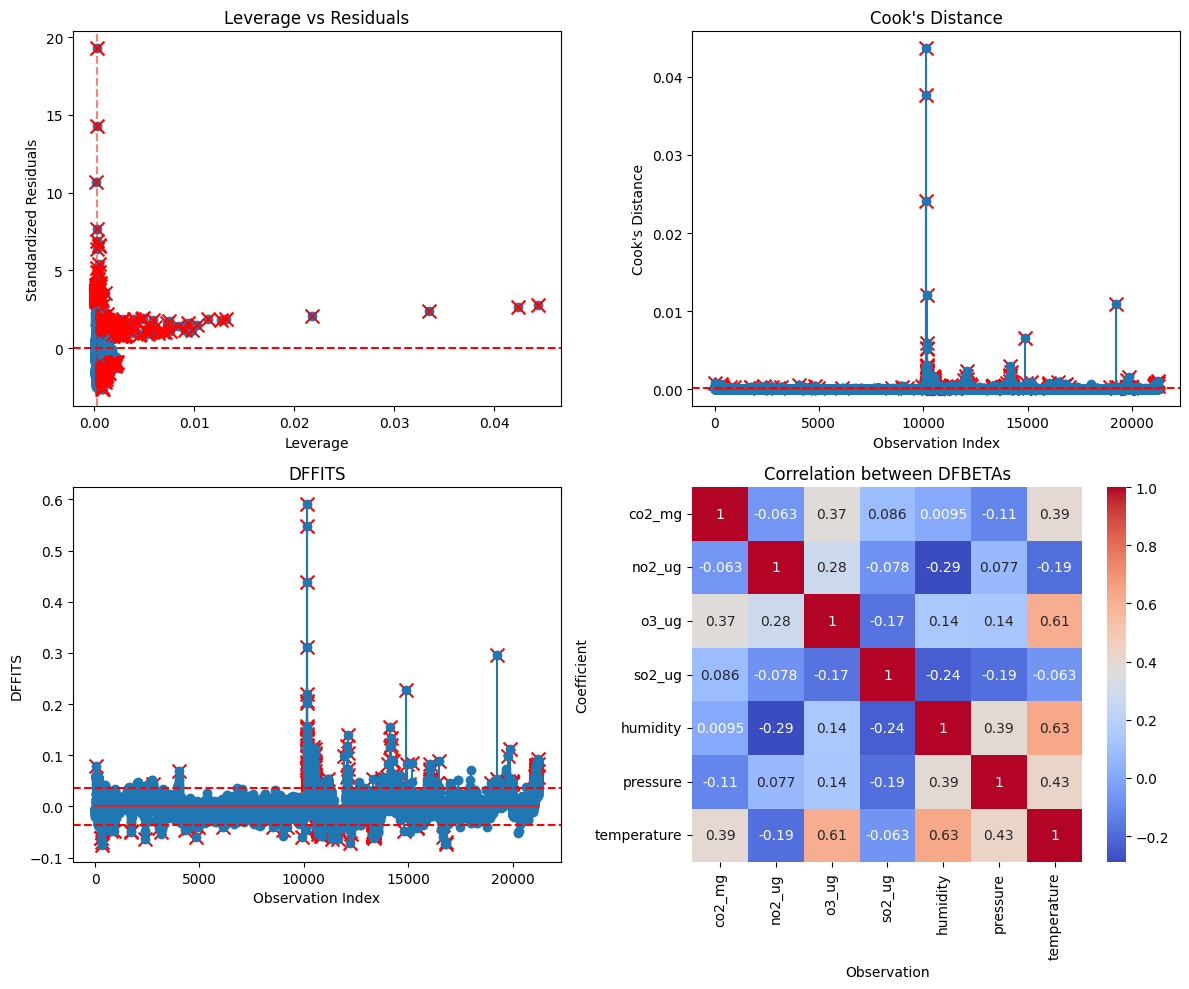

In [30]:
colunms = ["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]
suspects = df_flad_result[df_flad_result >= 4].index
n = len(y)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Leverage vs residuals
axes[0, 0].scatter(h_ii, r_i)
axes[0, 0].scatter(h_ii[suspects], r_i[suspects], color="red", marker="x", s=100)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].axvline(x=2*3/n, color='r', linestyle='--', alpha=0.5)

axes[0, 0].set_title("Leverage vs Residuals")
axes[0, 0].set_xlabel('Leverage')
axes[0, 0].set_ylabel('Standardized Residuals')


# Cook's Distance
axes[0, 1].stem(range(n), D)
axes[0, 1].axhline(y=4/n, color="red", linestyle='--')
axes[0, 1].scatter(suspects, D[suspects], color="red", marker="x", s=100)

axes[0, 1].set_title("Cook's Distance")
axes[0, 1].set_xlabel('Observation Index')
axes[0, 1].set_ylabel("Cook's Distance")

# DFFITS
axes[1, 0].stem(range(n), DFFITS)
threshold = 2*np.sqrt(7/n)
axes[1, 0].axhline(y=threshold, color='r', linestyle='--')
axes[1, 0].axhline(y=-threshold, color='r', linestyle='--')
axes[1, 0].scatter(suspects, DFFITS[suspects], color="red", marker="x", s=100)

axes[1, 0].set_title('DFFITS')
axes[1, 0].set_xlabel('Observation Index')
axes[1, 0].set_ylabel('DFFITS')


# Influence on coefficients

# Кореляція між стовпчиками
X_block_414 = DFBETAS[:, 1:]
X_mean = X_block_414.mean(axis=0)
X_std = X_block_414.std(axis=0, ddof=1)
Z = (X_block_414 - X_mean) / X_std

R = (Z.T @ Z) / (n-1)
corr = R
# corr = np.corrcoef(DFBETAS[:, 1:].T)



sns.heatmap(corr, xticklabels=colunms, yticklabels=colunms, cmap="coolwarm", annot=True)
plt.title("Correlation between DFBETAs")
# plt.show()
# plt.title("DFBEATS Heatmap (Influence on Coefficients)")
plt.xlabel("Observation")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.show()


In [31]:
print(X.shape)
pd.DataFrame(X[df_flad_result[(df_flad_result < 4)], :]).describe()
# pd.DataFrame(X[mask, :]).describe()
df_flad_result[(df_flad_result < 4)].shape

(21238, 8)


(20922,)

In [32]:

X = df_regression_1[["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]].copy()
X = X.to_numpy()

X = sm.add_constant(X)
y = df_regression_1.pm25.to_numpy().copy()

# pd.DataFrame(X).describe()

X_s = X[(df_flad_result < 1), :]
y_s = y[(df_flad_result < 1)]

# X_s = X[df_flad_result[~mask], :]
# y_s = y[df_flad_result[~mask]]
# mask = (((df_flad.leverage == True) & (df_flad.DFBETAS == True) & (df_flad.DFFITAS == True) & (df_flad.Cooks_distance == True)) |
#  (df_flad.outliers == True))
# X_s = X[~mask]
# y_s = y[~mask]

X_s = X_s[:15000, :]
y_s = y_s[:15000]

XTX_inv = np.linalg.inv(X_s.T @ X_s)
beta = XTX_inv @ X_s.T @ y_s

y_p = X_s @ beta
e_i = y_s - y_p


def R_2(y, y_predict):
  R = 1 - (((y - y_predict)**2).sum() / ((y - y.mean())**2).sum() )
  return R

R_2(y_s, y_p)


np.float64(0.4942808646598763)

In [33]:

X = df_regression_1[["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]].copy()
X = X.to_numpy()

X = sm.add_constant(X)
y = df_regression_1.pm25.to_numpy().copy()

X_s = X[:15000].copy()
y_s = y[:15000].copy()
df_flad_result = df_flad.sum(axis=1)
pd.DataFrame(X_s[(df_flad_result[:15000] == 0), :]).describe()
model = sm.OLS(y_s[(df_flad_result[:15000] == 0)], X_s[(df_flad_result[:15000] == 0), :]).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2046.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:21:07   Log-Likelihood:                -39656.
No. Observations:               12357   AIC:                         7.933e+04
Df Residuals:                   12349   BIC:                         7.939e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -100.0348      8.904    -11.235      0.0

In [34]:
X_intercept = X_s.copy()
y = y_s.copy()

n, k = X_intercept.shape
beta = np.linalg.inv(X_intercept.T @ X_intercept) @ (X_intercept.T @ y)
e_i = y - X_intercept @ beta
e_org = e_i.copy()

#1.1 Cochrane-Orcutt Procedure
for _ in range(3):
  rho = np.corrcoef(e_i[1:], e_i[:-1])[0,1]

  y_hat = y[1:] - rho * y[:-1]
  X_hat = X_intercept[1:] - rho * X_intercept[:-1]



  beta_CO = np.linalg.inv(X_hat.T @ X_hat) @ (X_hat.T @ y_hat)
  e_i_CO = y_hat - X_hat @ beta_CO

  y = y_hat.copy()
  X_intercept = X_hat.copy()
  e_i = e_i_CO.copy()

# #1.2 HC3
# h_ii_s = h_ii[(df_flad_result < 4)]
# h_ii_s = h_ii_s[:len(e_i)]
# # Діагональма матриця
# omega = np.diag((e_i.flatten()**2) / (1 - h_ii_s)**2)
# # Коваріаційна матриця
# cov_beta_HC3 = np.linalg.inv(X_intercept.T @ X_intercept) @ (X_intercept.T @ omega @ X_intercept) @ np.linalg.inv(X_intercept.T @ X_intercept)
# # Стандартні помилки
# se_HC3 = np.sqrt(np.diag(cov_beta_HC3))
# print("HC3 стардатні помилки ", se_HC3)

model = sm.OLS(y[:], X_intercept[:, 1:]).fit(cov_type='HC3') # при 2500 samples Durbin-Watson:1.080,  R-squared:0.383
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.182
Model:                            OLS   Adj. R-squared (uncentered):              0.182
Method:                 Least Squares   F-statistic:                              465.2
Date:                Tue, 14 Oct 2025   Prob (F-statistic):                        0.00
Time:                        21:21:07   Log-Likelihood:                         -34920.
No. Observations:               14997   AIC:                                  6.985e+04
Df Residuals:                   14990   BIC:                                  6.991e+04
Df Model:                           7                                                  
Covariance Type:                  HC3                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

### Хоч і виправили автокореляцію, трохи мультиколінеарність але все методом Cochrane-Orcutt Procedure, але $R^2$ погіршився.


### Із вище проведених експереметів, маю гівотезу, що не вистачає моделі сезонності, а саме таких фіч, які могли б допомогти моделі розуміти часовий відрізок

In [63]:
X = df_regression_1[["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]].copy().to_numpy()
y = df_regression_1.pm25.to_numpy().copy()

X = sm.add_constant(X)
# Фічі для сезонності
X = X[(df_flad_result == 0)]
y = y[(df_flad_result == 0)]

split_idx = int(len(y) * 0.7)

X_train, X_test = X[:split_idx, :], X[split_idx:, :]
y_train, y_test = y[:split_idx], y[split_idx:]

T = 288  # період
t = np.arange(len(y_train))  # індекс часу

X_seasonal = np.column_stack([X_train, np.sin(2*np.pi* t / T), np.cos(2*np.pi* t / T)])

# Сама регресія
XTX_inv = np.linalg.inv(X_seasonal.T @ X_seasonal)
beta_seasonal = XTX_inv @ X_seasonal.T @ y_train

y_pred_seasonal = X_seasonal @ beta_seasonal
e_seasonal = y_train - y_pred_seasonal

def R_2(y_, y_predict):
  return 1 - (((y_ - y_predict)**2).sum() / ((y_ - y_.mean())**2).sum())

print("R^2_seasonal: ", R_2(y_train, y_pred_seasonal))


R^2_seasonal:  0.5365592359365848


In [75]:
t = np.arange(len(y_test))
X_seasonal_test = np.column_stack([X_test, np.sin(2*np.pi* t / T), np.cos(2*np.pi* t / T)])

y_pred_seasonal_test = X_seasonal_test @ beta_seasonal
e_pred_test = y_test - y_pred_seasonal_test

def R_2(y_, y_predict):
  return 1 - (((y_ - y_predict)**2).sum() / ((y_ - y_.mean())**2).sum())

print("R^2_test_seasonal: ", R_2(y_test, y_pred_seasonal_test))

R^2_test_seasonal:  0.19766749472176692


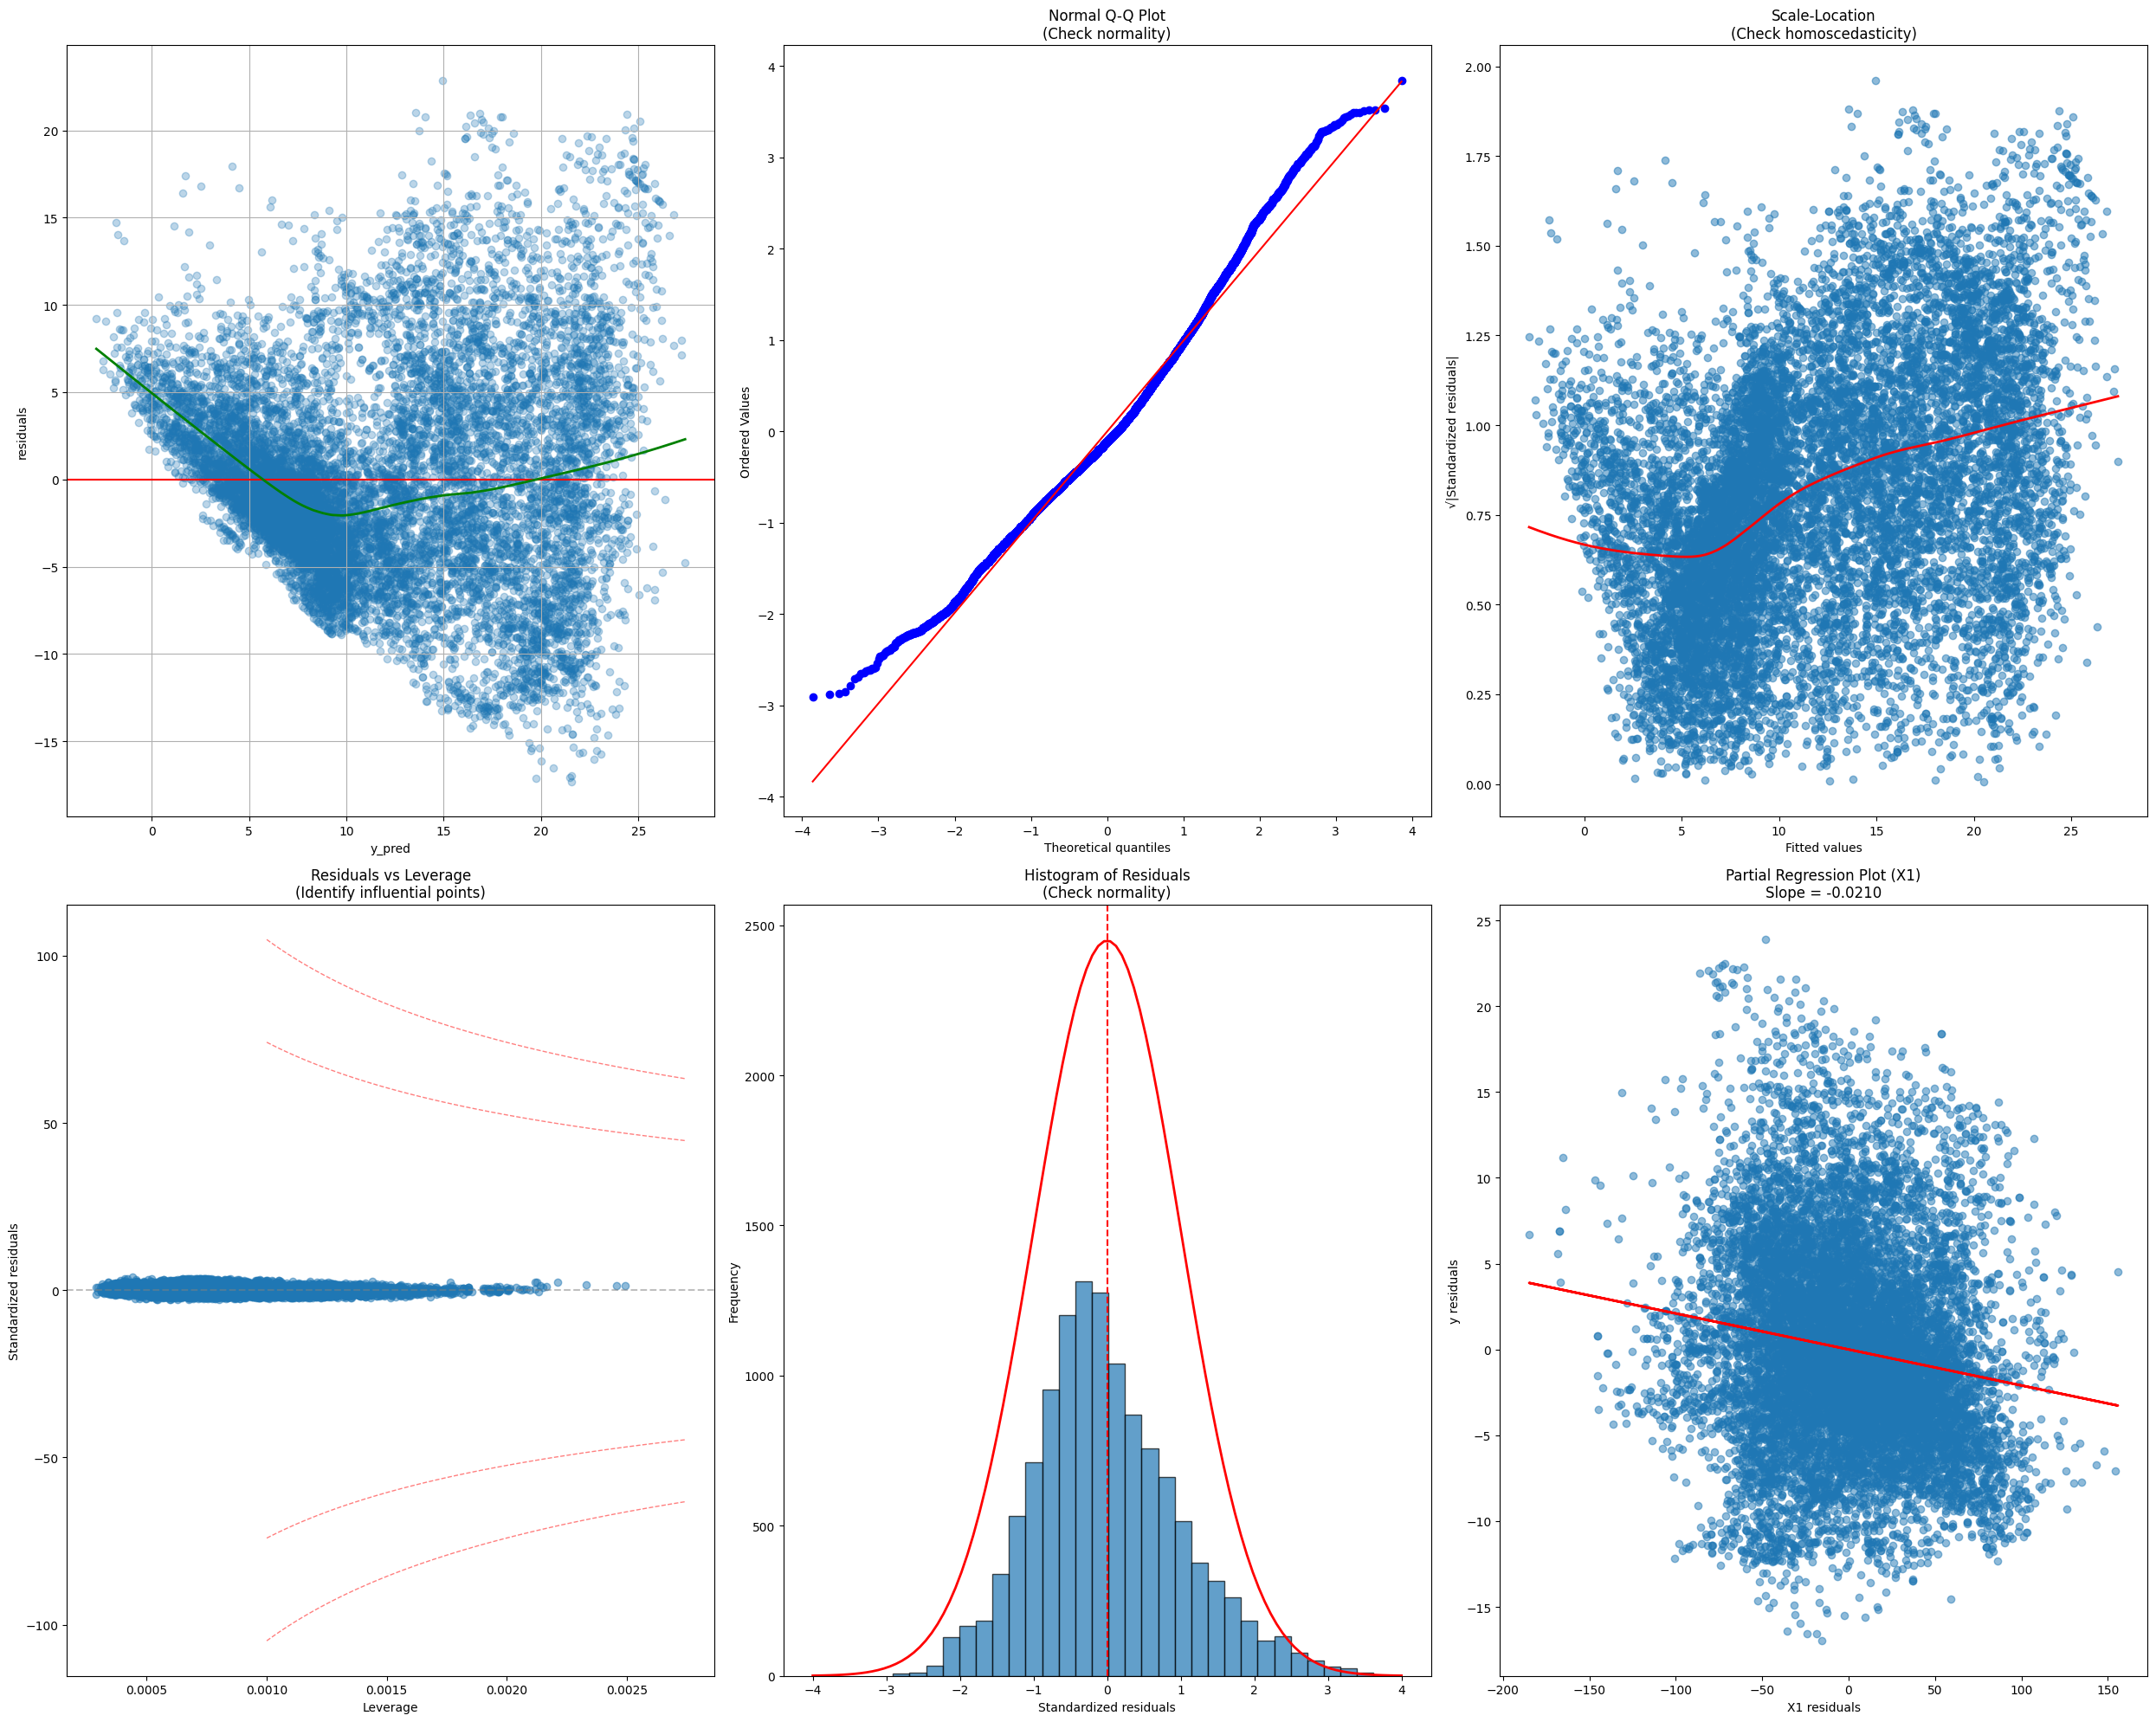

In [64]:
DIAGNOSTIC_PLOTS(X_seasonal, y_train, y_pred_seasonal, e_seasonal)

In [65]:
DIAGNOSTIC_TEST(X_seasonal, y_train, y_pred_seasonal, e_seasonal, beta_seasonal,
                columns=["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature", "sin", "cos"])


VIF: 1.5101564262523863 1.6140854288318294 1.7968490835263717 1.4381908228341715 2.183908809407743 1.615252818218705 3.670748368045282 1.0099448146924666 1.015169317327785
Mean VIF: 1.7615895432374156

cond_num: 219842.49138021705

F: 566.6476623342683,  pval_RT:1.1102230246251565e-16

Shapiro-Wilk test: W = 0.9852569199801321, p_value = 1.143708113619518e-33

JB: 527.0695225434561,  p_value: 0.0

DW:  0.076139541489738 

LM: 1716.4952307228182,  p_value: 0.0



/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12276.
  res = hypotest_fun_out(*samples, **kwds)


## **Висновок:** У нас явний overfiting. Тому надалі будемо використовувати регуляризацію та рухатися у напрямку часових рядів

# **BLOCK 5**
### Провести кореляційний аналіз входів та виходів набору даних, виявити взаємозалежні фактори

In [79]:
X = df_regression_1[["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]].to_numpy().copy()
y = df_regression_1.pm25.to_numpy().copy()

X = sm.add_constant(X)
# Фічі для сезонності
X = X[(df_flad_result == 0)]
y = y[(df_flad_result == 0)]

T = 288  # період
t = np.arange(len(y))  # індекс часу

X_corr_analysis= np.column_stack([X, np.sin(2*np.pi* t / T), np.cos(2*np.pi* t / T)])


In [80]:
# 3. Classic correlation method
# 3.1 Pearson
def pearson_X_X(X, columns):
  X = np.asarray(X)
  n = X.shape[0]

  # Центруємо по стовпцям
  X_c = X - X.mean(axis=0, keepdims=True)

  # Коваріаційна матриця (p * p)
  cov = (X_c.T @ X_c) / (n - 1)
  std = np.sqrt(np.diag(cov))  # (p, )

  # outer - зовнішній добуток (a, b) [[a_1b_1 , a_1b_2][a_2b_1 , a_2b_2][a_3b_1 , a_3b_2]]
  denom = np.outer(std, std)
  corr = cov / denom

  np.fill_diagonal(corr, 1.0)
  return pd.DataFrame(corr, index=columns, columns=columns)

def pearson_X_Y(X, y, columns):
  X = np.asarray(X)
  y = np.asarray(y)
  n = X.shape[0]

  X_c = X - X.mean(axis=0, keepdims=True)
  y_c = y - y.mean()
  cov_xy = (X_c.T @ y_c) / (n - 1)
  s_x = np.sqrt(np.sum(X_c**2, axis=0) / (n - 1))
  s_y = np.sqrt(np.sum(y_c**2, axis=0) / (n - 1))

  r = cov_xy / (s_x * s_y)

  return pd.Series(r, index=columns)

columns = ["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature", "sin", "cos"]
corr_X_X = pearson_X_X(X_corr_analysis[:,1:], columns)
# Коеф. Пірсона є симетричним, тобто X_Y = Y_X
corr_X_Y = pearson_X_Y(X_corr_analysis[:,1:], y, columns)
# Реалізація на pandas
# corr_X_X_numpy = pd.DataFrame(X_block_5, columns=columns).corr(method='pearson')

# 3.2 Spearman
"""Якщо коеф Пірсона та Спірмена низьки фактор не впливає
   Якщо коеф Пірсона (низький) та Спірмена(високий) потрібна трансформація"""
def spearman_X_X(X, columns):
  X = np.asarray(X)

  X_rank = np.apply_along_axis(lambda col: pd.Series(col).rank().to_numpy(), axis=0, arr=X)
  return pearson_X_X(X_rank, columns)

def spearman_X_Y(X, y, columns):
  X = np.asarray(X)
  y = np.asarray(y)

  X_rank = np.apply_along_axis(lambda col: pd.Series(col).rank().to_numpy(), axis=0, arr=X)
  y_rank = pd.Series(y).rank().to_numpy()

  return pearson_X_Y(X_rank, y_rank, columns)




spearman_X_X = spearman_X_X(X_corr_analysis[:,1:], columns)
spearman_X_Y = spearman_X_Y(X_corr_analysis[:,1:], y, columns)


In [81]:
# VIF
vif_d = dict()

X_without_ones = X_seasonal[:,1:].copy()


for i in range(X_without_ones.shape[1]):
    y_i = X_without_ones[:, i]
    X_other = np.delete(X_without_ones, i, axis=1)

    reg_i_block_4 = linear_model.LinearRegression()
    reg_i_block_4.fit(X_other, y_i)

    y_i_predict = reg_i_block_4.predict(X_other)

    r_2 = 1 - (np.sum((y_i - y_i_predict)**2) / np.sum((y_i - y_i.mean())**2))

    # r_2 = reg.score(X_other, y_i)

    vif_ = 1/ (1 - r_2) if r_2 < 1 else np.inf
    vif_d[columns[i]] = vif_

Mean VIF: 1.7615895432374156


Pearson X_Y: 
 co2_mg         0.068939
no2_ug        -0.241607
o3_ug          0.285468
so2_ug         0.580206
humidity       0.483757
pressure       0.322586
temperature   -0.542527
sin           -0.007065
cos            0.018251
dtype: float64


Spearman X_Y: 
 co2_mg         0.074626
no2_ug        -0.217636
o3_ug          0.275280
so2_ug         0.611021
humidity       0.480906
pressure       0.342297
temperature   -0.565515
sin           -0.008718
cos            0.009384
dtype: float64


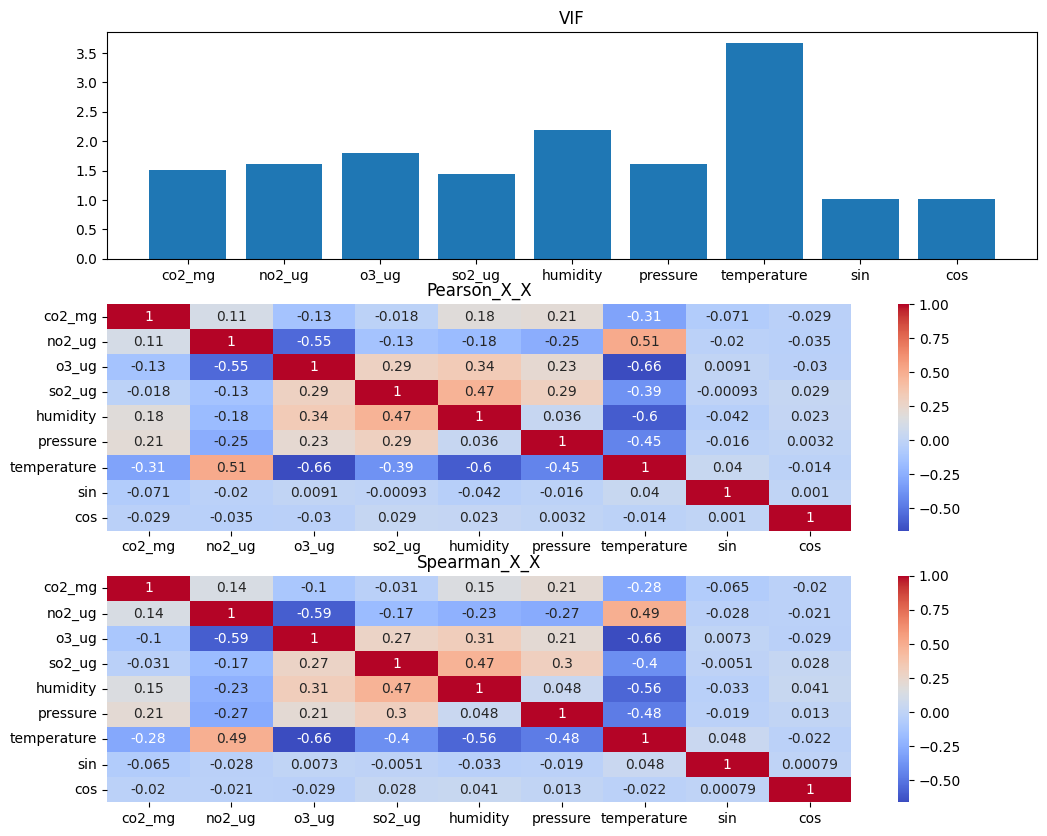

In [82]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
# 2. OUTPUT VIF
axes[0].bar(vif_d.keys(), vif_d.values(), width=0.8)   #!!!!!!!!!!!!!!!!!!
axes[0].set_title("VIF")
print("Mean VIF:", np.mean((list(vif_d.values()))))


# 3.1 OUTPUT pearson

sns.heatmap(corr_X_X, xticklabels=columns, yticklabels=columns, cmap="coolwarm", annot=True, ax=axes[1])
print("\n\nPearson X_Y: \n", corr_X_Y)
axes[1].set_title("Pearson_X_X")
# sns.heatmap(corr_X_X_numpy, xticklabels=columns, yticklabels=columns, cmap="coolwarm", annot=True)


# 3.2 OUTPUT Spearman
sns.heatmap(spearman_X_X, xticklabels=columns, yticklabels=columns, cmap="coolwarm", annot=True, ax=axes[2])
axes[2].set_title("Spearman_X_X")
print("\n\nSpearman X_Y: \n", spearman_X_Y)


# # 3.3 OUTPUT
# print("\n\nt_tests X_Y: \n", df_t_stats_X_Y)

# sns.heatmap(df_t_stats_X_X, xticklabels=columns, yticklabels=columns, cmap="coolwarm", annot=True, ax=axes[1,1])
# axes[1, 1].set_title("t_stats_X_X")

In [83]:
pd.DataFrame(X, columns=columns.append("const")).describe()

0             1             2             3             4  \
count  17538.0  17538.000000  17538.000000  17538.000000  17538.000000   
mean       1.0    872.605796     45.432084     27.912392     16.995176   
std        0.0     49.922688     10.684485     20.051272      7.779728   
min        1.0    698.753900      0.000000      0.000000      0.000000   
25%        1.0    840.773075     37.753400     10.819200     11.517300   
50%        1.0    868.170050     43.755150     20.792000     17.175850   
75%        1.0    901.618650     51.765850     46.839275     22.447850   
max        1.0   1072.166500     89.856000     79.043100     41.730400   

                  5             6             7  
count  17538.000000  17538.000000  17538.000000  
mean      72.748451   1001.437850      8.432262  
std       15.595753      8.670271      8.540758  
min       22.690000    976.220000     -7.920000  
25%       63.100000    995.130000      1.500000  
50%       76.200000   1001.320000      6.000000  
75%       84.600000   1007.030000     15.300000  
max       97.000000   1029.600000     30.000000

## **Висновок:** всі, окрім, so2_ug, humidity та temperature помірно значущі фічі інші слабкі

# **BLOCK 6**
### Провести підготовку даних до подальшого використання

 co2_mg         0.068939 <br>
no2_ug        -0.241607<br>
o3_ug          0.285468<br>
so2_ug         0.580206<br>
humidity       0.483757<br>
pressure       0.322586<br>
temperature   -0.542527<br>
sin           -0.007065<br>
cos            0.018251<br>
<br><br>
 co2_mg         0.074626<br>
no2_ug        -0.217636<br>
o3_ug          0.275280<br>
so2_ug         0.611021<br>
humidity       0.480906<br>
pressure       0.342297<br>
temperature   -0.565515<br>
sin           -0.008718<br>
cos            0.009384<br>


In [111]:
# БУДЕ три датасети
X = df_regression_1[["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity", "pressure", "temperature"]].to_numpy().copy()
y = df_regression_1.pm25.to_numpy().copy()

X = sm.add_constant(X)

X = X[(df_flad_result == 0)]
y = y[(df_flad_result == 0)]

cross_index = int(len(y) * 0.7)



# Фічі для сезонності
T = 288  # період
t = np.arange(len(y))  # індекс часу

# перший має всі фічі
X_DS1 = np.column_stack([X, np.sin(2*np.pi* t / T), np.cos(2*np.pi* t / T)])


# другий має лише помірно та сильно значущі
X_DS2 = X_DS1[:, [0,4,5,7]].copy()


# третій матиме лаги для таргета (y)
y_lag_1 = np.roll(y, 1)
# y_lag_1[0] = np.nan
y_lag_2 = np.roll(y, 2)
# y_lag_2[:2] = np.nan
y_lag_3 = np.roll(y, 3)
# y_lag_3[:3] = np.nan

# 1 2 3 4 5
# nan 1 2 3 4
# nan nan 1 2 3

X_DS3 = np.column_stack([X_DS1, y_lag_1, y_lag_2, y_lag_3])[3:, :]
X_DS2 = X_DS2[3:]
X_DS1 = X_DS1[3:]

y = y[3:]
y_seasonal_train, y_seasonal_test = y[:cross_index].copy(), y[cross_index:].copy()

## Отже дані розбиті на датасети і будуть протестовані із застосуванням регуляризації та маштауванням фіч

# **BLOCK 7**
### Обраний та відфільтрований набір даних розбити на навчальну та тестову частину (70% на навчання, 30% на тест).

##Vanilla Python (Numpy/Pandas)

In [113]:
# Для більшої інформативності розібʼємо датасет на відрізки
n_splits = 9
n = len(y)
size_diff_split = n // (n_splits+1)

splits = []

for i in range(1, n_splits+1):
  train_end = size_diff_split * i
  test_end = size_diff_split * (i + 1)
  splits.append((train_end, test_end))


def standardize(X_train, X_test):
  mean_train = X_train.mean(axis=0)
  std_train = X_train.std(axis=0)
  std_train[std_train == 0] = 1

  X_train_s = (X_train - mean_train) / std_train
  X_test_s = (X_test - mean_train) / std_train

  return X_train_s, X_test_s


def ridge_fit(X, y, alpha=1):
  n = X.shape[1]
  I = np.ones(n)
  beta = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y

  return beta


def ridge_predict(X, beta):
  return X @ beta


r_2_ds = [[], [], []]
list_ds = [X_DS1, X_DS2, X_DS3]
for index_ds in range(3):
  for train_end, test_end in splits:
    X_train, X_test = list_ds[index_ds][:train_end, :].copy(), list_ds[index_ds][train_end:test_end, :].copy()
    y_train, y_test = y[:train_end].copy(), y[train_end:test_end].copy()


    # Стандартизація

    X_train_s, X_test_s = standardize(X_train, X_test)

    X_train_s = sm.add_constant(X_train_s)
    X_test_s = sm.add_constant(X_test_s)


    # Навчання
    beta = ridge_fit(X_train_s, y_train)

    # Передбачення та R^2
    y_predict = X_test_s @ beta

    r_2 = 1 - (np.sum((y_test - y_predict)**2) / np.sum((y_test - y_test.mean())**2))
    r_2_ds[index_ds].append(r_2)


print("R^2 по всіх відрізках для DS_1: ", r_2_ds[0])
print("R^2 mean для DS_1: ", np.mean(r_2_ds[0]), '\n')

print("R^2 по всіх відрізках для DS_2: ", r_2_ds[1])
print("R^2 mean для DS_2: ", np.mean(r_2_ds[1]), '\n')

print("R^2 по всіх відрізках для DS_3: ", r_2_ds[2])
print("R^2 mean для DS_3: ", np.mean(r_2_ds[2]))


R^2 по всіх відрізках для DS_1:  [np.float64(0.049528334367535676), np.float64(-5.900344952675162), np.float64(-1.9298180069349664), np.float64(-1.275832948591547), np.float64(0.37160862580785037), np.float64(-1.8191535635526592), np.float64(0.11181264827682091), np.float64(0.31922994412989425), np.float64(0.07003517007861748)]
R^2 mean для DS_1:  -1.1114371943437353 

R^2 по всіх відрізках для DS_2:  [np.float64(0.14156970116555911), np.float64(-5.874022200059745), np.float64(-2.7470405861035516), np.float64(-1.6383031047085268), np.float64(0.2712558935984315), np.float64(-0.061376191782647416), np.float64(0.11555889365887617), np.float64(0.23087046593365657), np.float64(0.06702547132286463)]
R^2 mean для DS_2:  -1.0549401841083426 

R^2 по всіх відрізках для DS_3:  [np.float64(0.9592233158309648), np.float64(0.8552047959176079), np.float64(0.906890572533138), np.float64(0.8810889659618748), np.float64(0.9646928827627278), np.float64(0.9411604688995261), np.float64(0.9591765553679767)

## SciKit learn

In [115]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import TimeSeriesSplit

X_with_lev = df_wide_1.copy()[:21238]
for lag in range(1, 4):
  X_with_lev[f"pm25_lag{lag}"] = X_with_lev["pm25"].shift(lag)

X_with_lev = X_with_lev.dropna().reset_index(drop=True)
X_base = X_with_lev[["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity",
                    "pressure", "temperature","pm25_lag1", "pm25_lag2",
                     "pm25_lag3"]].to_numpy()
y = X_with_lev.pm25.to_numpy()

# Фічі для сезонності
T = 288  # період
t = np.arange(len(y))  # індекс часу

# перший має всі фічі
X_seasonal = np.column_stack([X_base, np.sin(2*np.pi* t / T), np.cos(2*np.pi* t / T)])


tscv = TimeSeriesSplit(n_splits=9)
r_2_ds = []

for train_indx, test_indx in tscv.split(X_seasonal):
    X_train, X_test = X_seasonal[train_indx], X_seasonal[test_indx]
    y_train, y_test = y[train_indx], y[test_indx]

    model = make_pipeline(StandardScaler(), Ridge(alpha=1))
    model.fit(X_train, y_train)

    r_2 = model.score(X_test, y_test)
    r_2_ds.append(r_2)


print("R^2 по всіх відрізках для DS_1: ", r_2_ds)
print("R^2 mean для DS_1: ", np.mean(r_2_ds), '\n')

R^2 по всіх відрізках для DS_1:  [0.9655432896784719, 0.8579551390988385, 0.906008442316526, 0.9266716071437677, 0.9047068198007786, 0.8714894452994091, 0.9047771449779246, 0.9587338048532914, 0.8398846575736709]
R^2 mean для DS_1:  0.9039744834158532 



## XGBoost

In [121]:
from xgboost import XGBRegressor
X_with_lev = df_wide_1.copy()
for lag in range(1, 4):
  X_with_lev[f"pm25_lag{lag}"] = X_with_lev["pm25"].shift(lag)

X_with_lev = X_with_lev.dropna().reset_index(drop=True)
X_base = X_with_lev[["co2_mg", "no2_ug", "o3_ug", "so2_ug", "humidity",
                    "pressure", "temperature","pm25_lag1", "pm25_lag2",
                     "pm25_lag3"]].to_numpy()
y = X_with_lev.pm25.to_numpy()

# Фічі для сезонності
T = 288  # період
t = np.arange(len(y))  # індекс часу

# перший має всі фічі
X_seasonal = np.column_stack([X_base, np.sin(2*np.pi* t / T), np.cos(2*np.pi* t / T)])


tscv = TimeSeriesSplit(n_splits=9)
r_2_ds = []

for train_indx, test_indx in tscv.split(X_seasonal):
  model = XGBRegressor(
      n_estimators = 100,  # кількість дерев
      max_depth = 3,
      learning_rate = 0.1,
      # subsample = 0.8,
      # colsample_bytree = 0.8,
      )

  model.fit(X_train, y_train)

  r_2 = model.score(X_test, y_test)
  r_2_ds.append(r_2)


print("R^2 по всіх відрізках для DS_1: ", r_2_ds)
print("R^2 mean для DS_1: ", np.mean(r_2_ds), '\n')

R^2 по всіх відрізках для DS_1:  [0.8814043979556515, 0.8814043979556515, 0.8814043979556515, 0.8814043979556515, 0.8814043979556515, 0.8814043979556515, 0.8814043979556515, 0.8814043979556515, 0.8814043979556515]
R^2 mean для DS_1:  0.8814043979556515 



# Висновок:
## Дуже цікаво було висувати, а потім бачити як руйнуються гіпотези. Загалом було вивчено багато методів і засвоєно на практиці тонкості цих методів

##Джерела:

###1.   [Коеф. кореляції Пірсона](https://studfile.net/preview/9290218/page:7/)
###2.   [КОРЕЛЯЦІЙНО-РЕГРЕСІЙНИЙ АНАЛІЗ (t-test)](https://elib.lntu.edu.ua/sites/default/files/elib_upload/%D0%9D%D1%83%D0%B6%D0%BD%D0%B0%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%B8%D0%B9/page6.html)
###3. [Shapiro-Wilk Test](https://medium.com/@data-overload/the-shapiro-wilk-test-a-guide-to-normality-testing-d730e820d1a8)
